# Reinforcement Q-learning simple NN as function approximation

- Portfolio grid of size 10 (0 to 1)
- 2 hidden neural layers 
- Training

In [1]:
# Initialization
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data = pd.read_csv('data.csv') #Three stocks (R,X_s,X_b,s_nom,s_pe,s_spr) 

In [12]:
data = pd.read_excel('sim_data_CER.xlsx') #Three stocks (R,X_s,X_b) Without predictors

# Initialization of the Tensorflow placeholders and the network

In [15]:
num_lags = 10
num_stocks=3
num_inputvar = (num_lags+1)*num_stocks
num_actions=10
hidden1 = 20
hidden2 = 45
hidden3 = 20

#Initialize Neural Network and set-up the placeholders
tf.reset_default_graph()
NN_input = tf.placeholder(shape=[1,num_inputvar],dtype=tf.float32)
# w1 = tf.Variable(tf.random_uniform([num_inputvar,hidden1],0,1))
# w2 = tf.Variable(tf.random_uniform([hidden1,hidden2],0,1))
# w3 = tf.Variable(tf.random_uniform([hidden2,hidden3],0,1))
# w4 = tf.Variable(tf.random_uniform([hidden3,num_actions],0,1))
# b1 = tf.Variable(np.zeros((1,hidden1)), dtype=tf.float32)
# b2 = tf.Variable(np.zeros((1,hidden2)), dtype=tf.float32)
# b3 = tf.Variable(np.zeros((1,hidden3)), dtype=tf.float32)
# b4 = tf.Variable(np.zeros((1,num_actions)), dtype=tf.float32)

w1 = tf.Variable(tf.random_uniform([num_inputvar,hidden1],0,0.01))
b1 = tf.Variable(np.ones((1,hidden1)), dtype=tf.float32) 
w2 = tf.Variable(tf.random_uniform([hidden1,num_actions],0,0.01))
b2 = tf.Variable(np.ones((1,num_actions)), dtype=tf.float32) 
# h1 = tf.add(tf.matmul(NN_input,w1),b1)
# # h_drop1 = tf.nn.dropout(h1,0.5)
# a1 = tf.nn.softmax(h1)

# h2 = tf.add(tf.matmul(a1,w2),b2)
# # h_drop2 = tf.nn.dropout(h2,0.3)
# a2 = tf.nn.softmax(h2)

# h3 = tf.add(tf.matmul(a2,w3),b3)
# # h_drop3 = tf.nn.dropout(h3,0.1)
# a3 = tf.nn.softmax(h3)

# ol = tf.add(tf.matmul(a3,w4),b4)
# output = tf.nn.softmax(ol)

outputh1 = tf.matmul(NN_input,w1)
# outputh1 = tf.nn.softmax(h1)
h2 = tf.matmul(outputh1,w2)
output = tf.nn.softmax(h2)
A_Max = tf.argmax(output,1)

Q_Next = tf.placeholder(shape=[1,num_actions],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(Q_Next - output))



learning_rate = tf.placeholder(tf.float32, shape=[])
trainer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
optmzr = trainer.minimize(loss)


# A_Max = tf.argmax(output,1)
# Calculate loss for the NN from the Q values
# Q_Next = tf.placeholder(shape=[1,num_actions],dtype=tf.float32)
# diff = tf.subtract(Q_Next,output)
# loss = tf.reduce_sum(tf.multiply(diff,diff))

# cross_entropy = tf.reduce_mean(-tf.reduce_sum(a4 * tf.log(Q_Next), reduction_indices=[1]))
# optmzr = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(loss)
A = np.linspace(0,1,num_actions) # portfolio weights of stocks (1-weight) is the weight in the bonds

# Training of the NN function approximation

1980-07-01 00:00:00


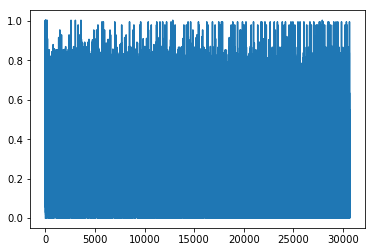

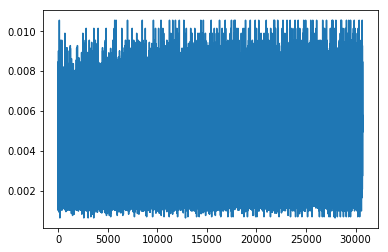

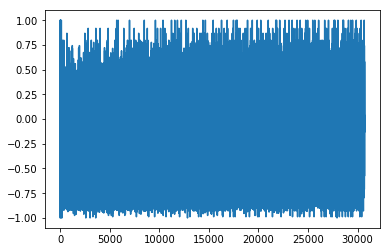

307
1.40973822526
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1980-08-01 00:00:00


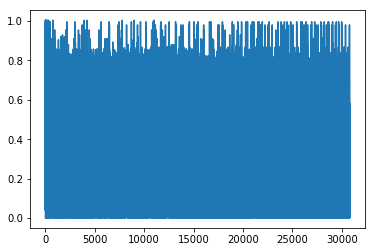

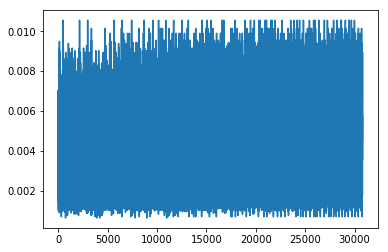

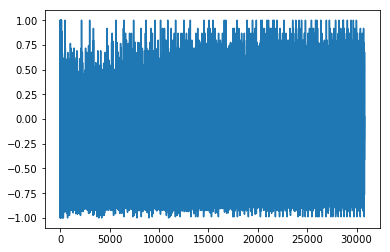

308
1.41191469982
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1980-09-01 00:00:00


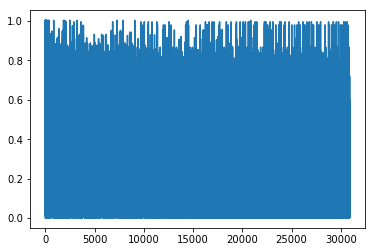

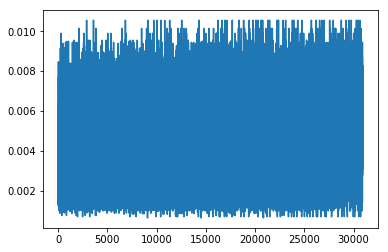

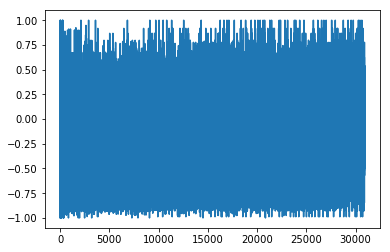

309
1.4088276745
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1980-10-01 00:00:00


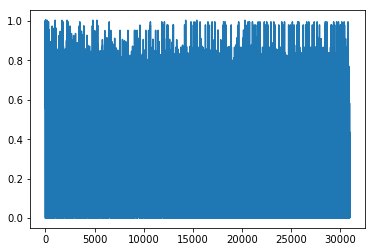

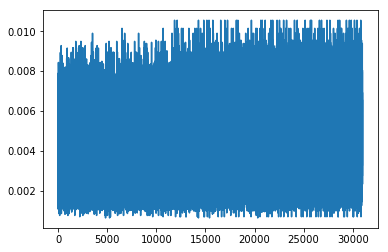

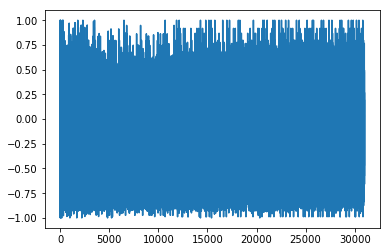

310
1.40832819398
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1980-11-01 00:00:00


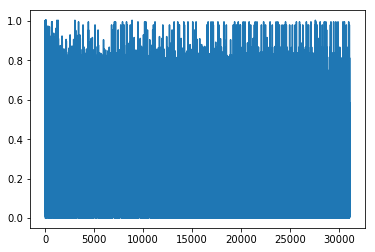

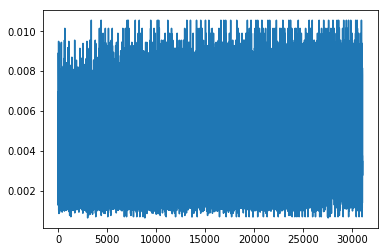

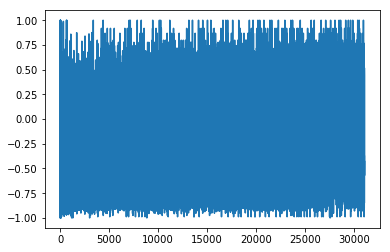

311
1.40721054408
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1980-12-01 00:00:00


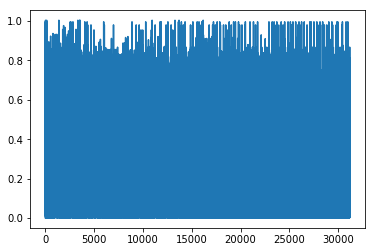

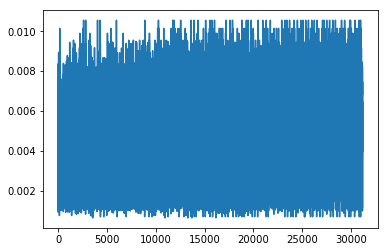

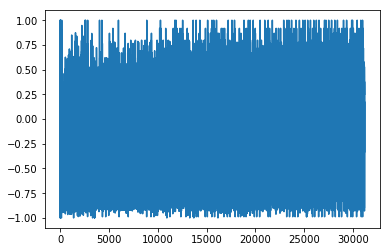

312
1.40355819573
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1981-01-01 00:00:00


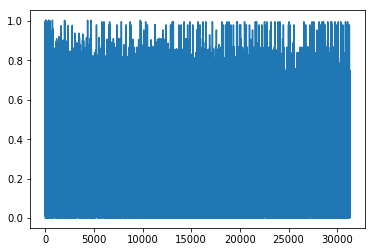

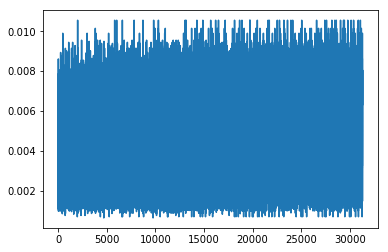

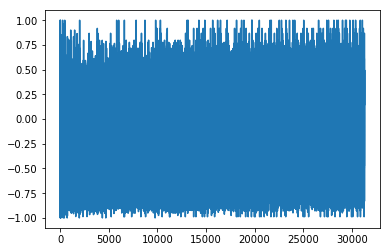

313
1.40322720648
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1981-02-01 00:00:00


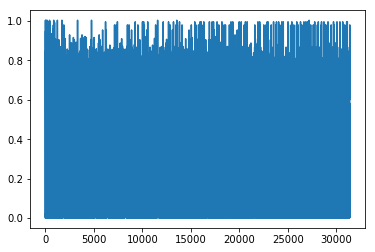

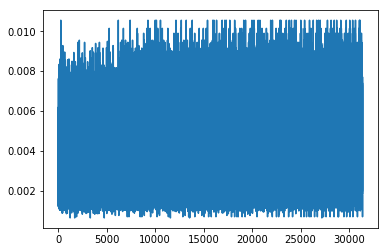

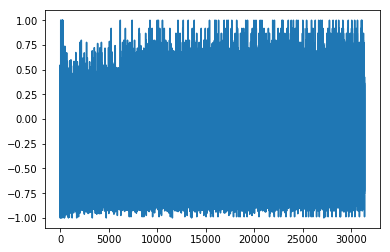

314
1.40380337293
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1981-03-01 00:00:00


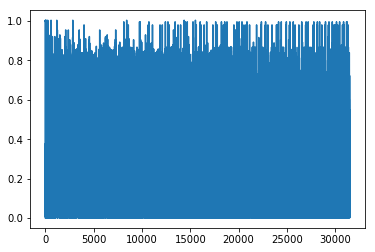

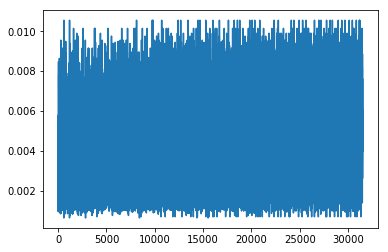

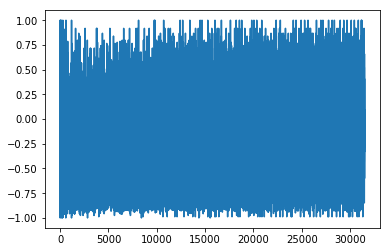

315
1.39891592967
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1981-04-01 00:00:00


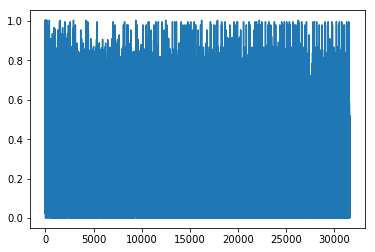

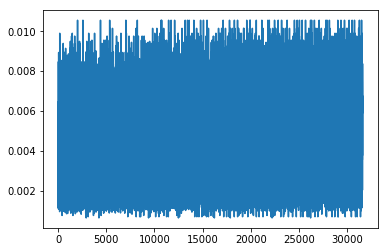

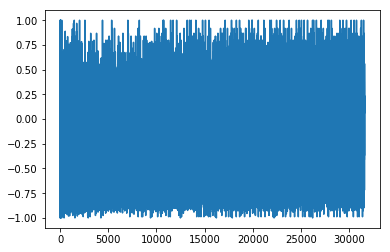

316
1.39705549035
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1981-05-01 00:00:00


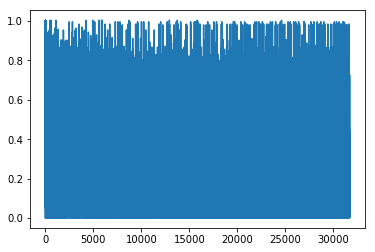

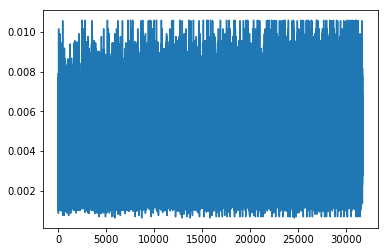

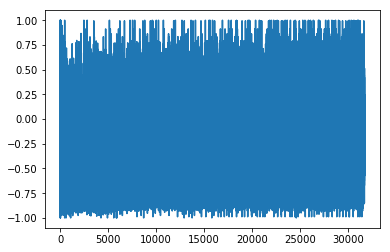

317
1.39152655083
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1981-06-01 00:00:00


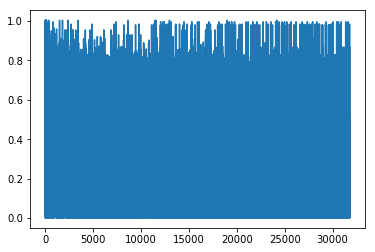

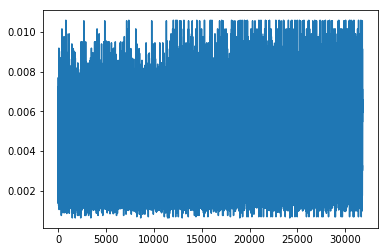

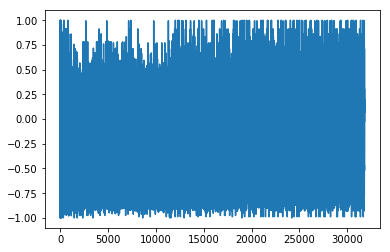

318
1.39541688258
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1981-07-01 00:00:00


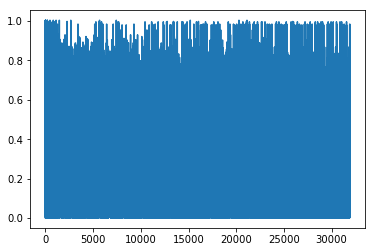

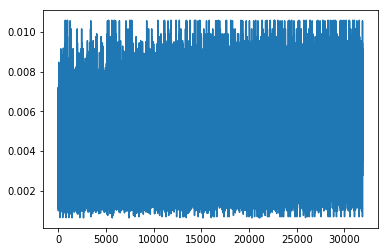

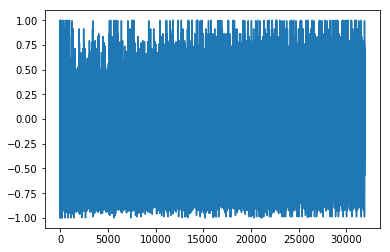

319
1.39308234705
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1981-08-01 00:00:00


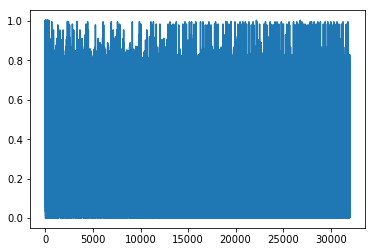

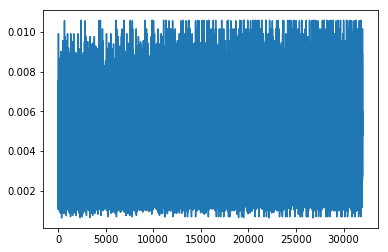

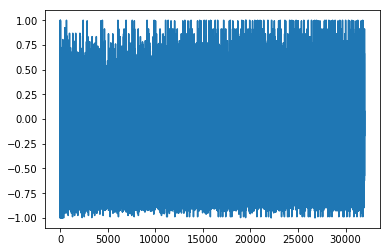

320
1.39468638844
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1981-09-01 00:00:00


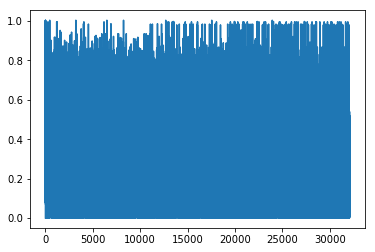

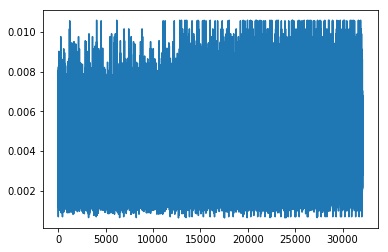

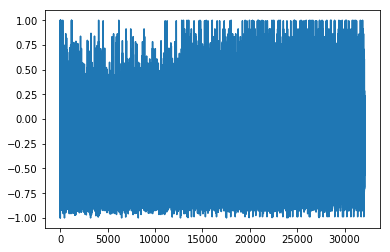

321
1.39976790836
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1981-10-01 00:00:00


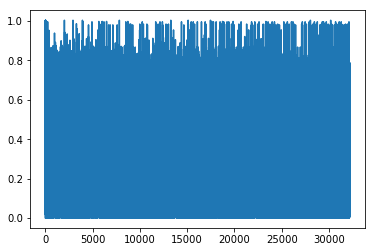

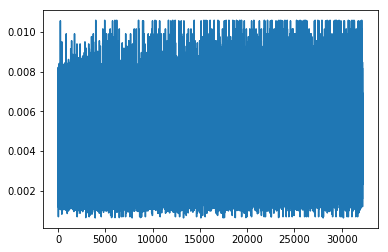

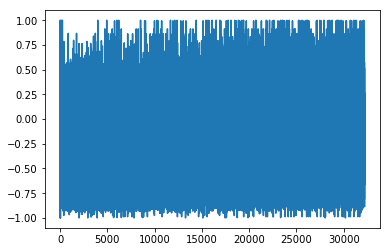

322
1.40317846132
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1981-11-01 00:00:00


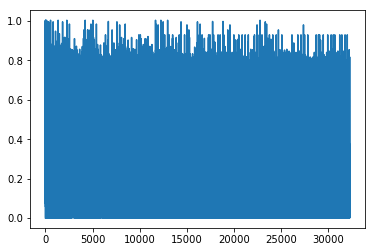

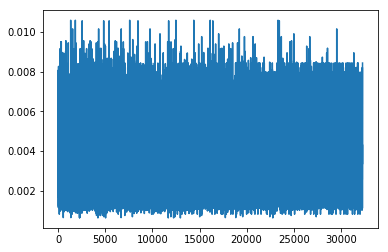

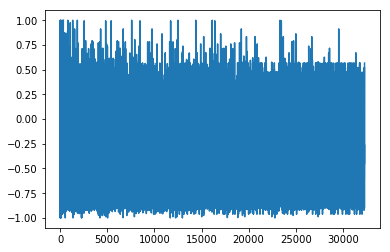

323
1.31844300997
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1981-12-01 00:00:00


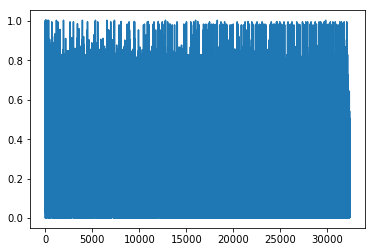

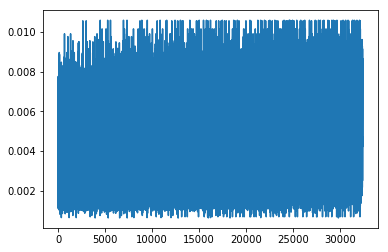

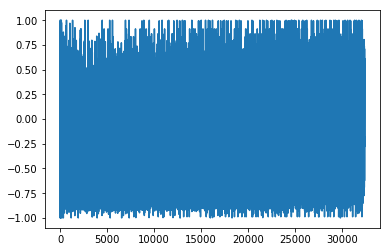

324
1.39221921313
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1982-01-01 00:00:00


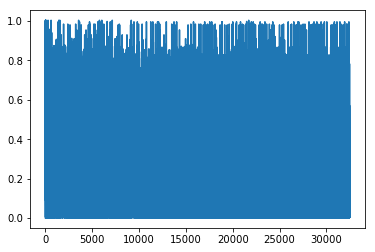

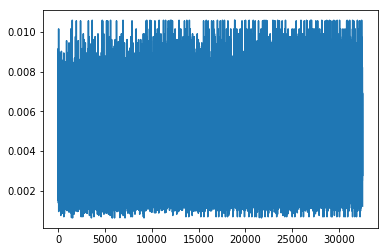

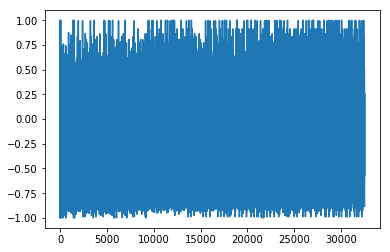

325
1.39323600304
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1982-02-01 00:00:00


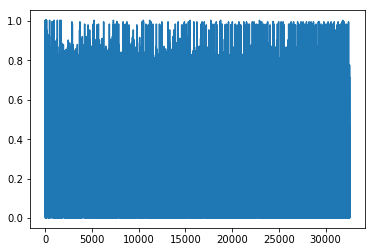

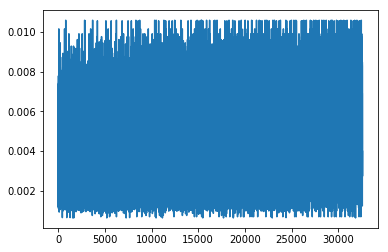

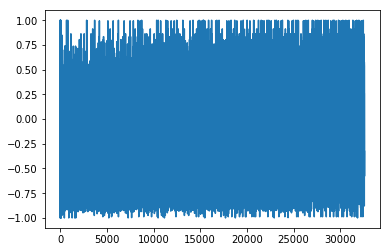

326
1.39010099175
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1982-03-01 00:00:00


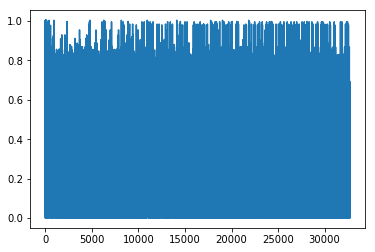

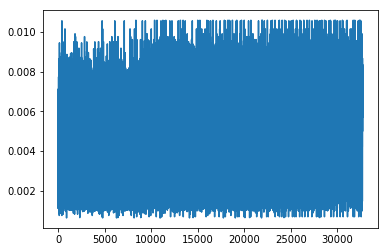

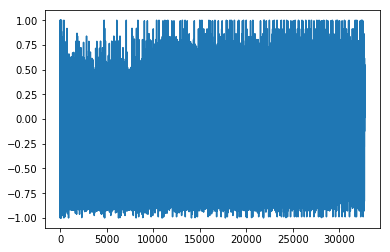

327
1.38916394064
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1982-04-01 00:00:00


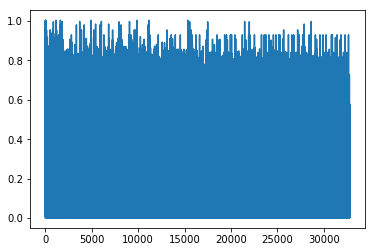

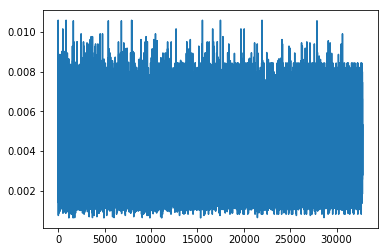

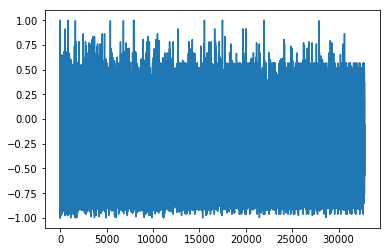

328
1.31363345584
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1982-05-01 00:00:00


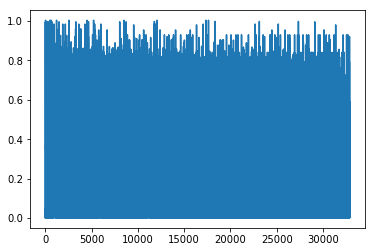

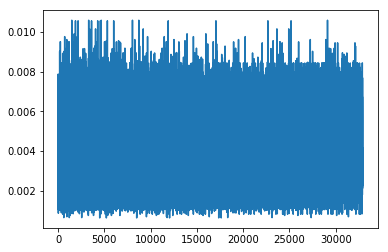

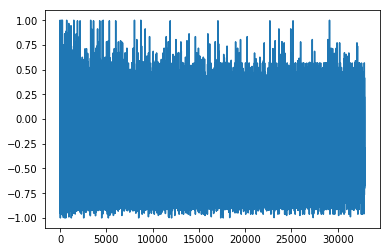

329
1.31130513812
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1982-06-01 00:00:00


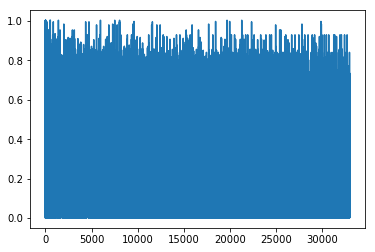

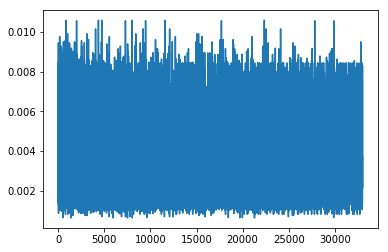

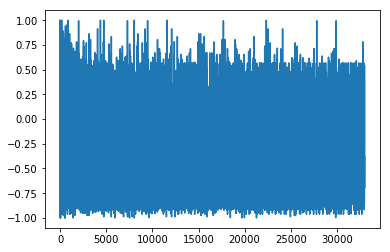

330
1.30681533692
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1982-07-01 00:00:00


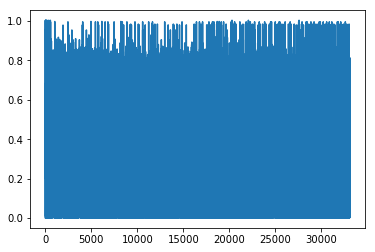

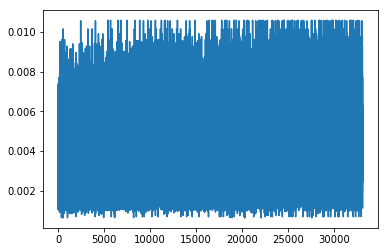

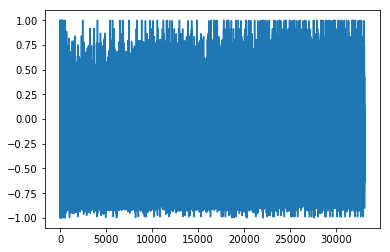

331
1.37662425055
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1982-08-01 00:00:00


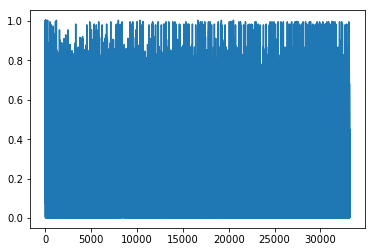

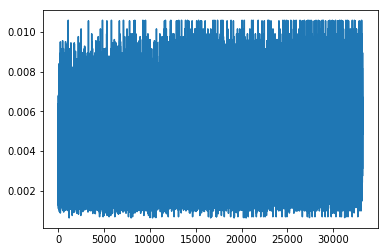

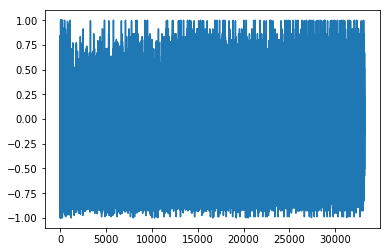

332
1.37614321957
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1982-09-01 00:00:00


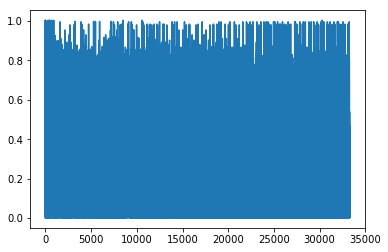

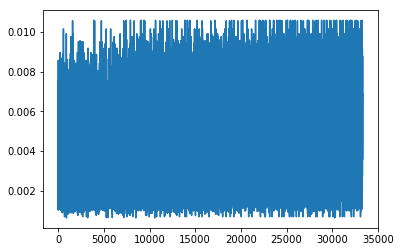

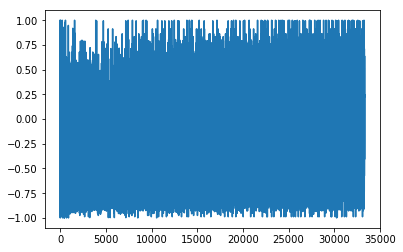

333
1.37584061359
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1982-10-01 00:00:00


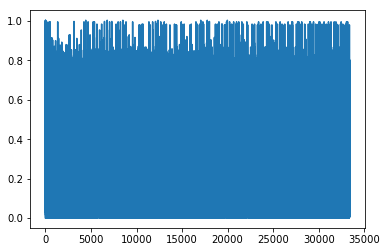

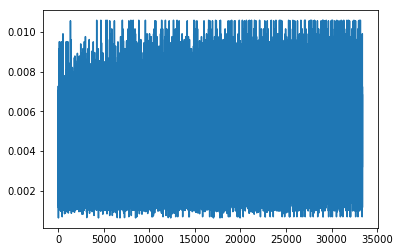

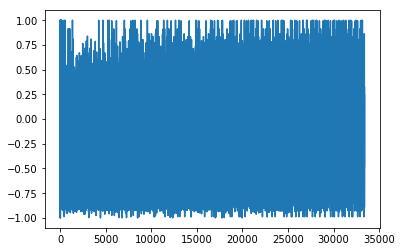

334
1.37635588716
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1982-11-01 00:00:00


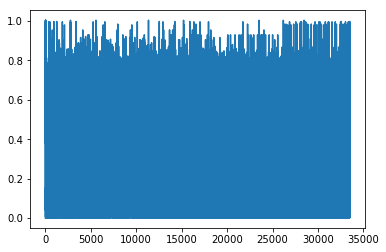

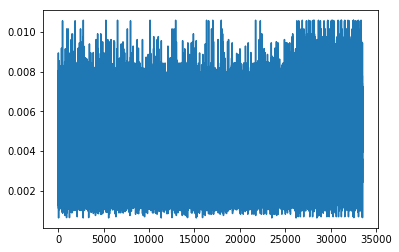

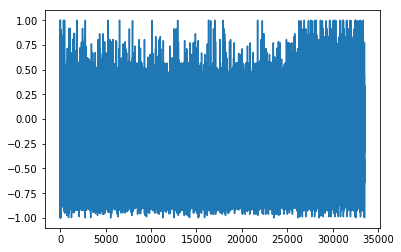

335
1.37779969453
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1982-12-01 00:00:00


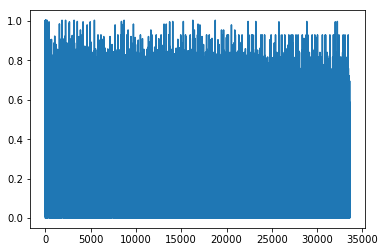

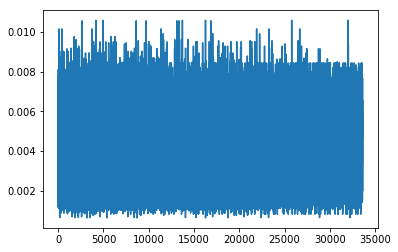

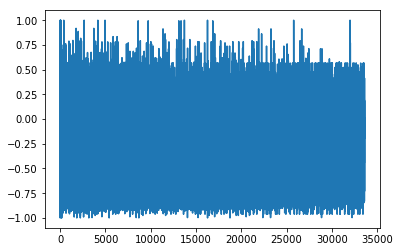

336
1.3079381138
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1983-01-01 00:00:00


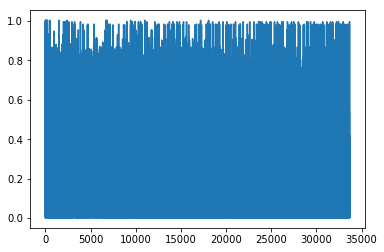

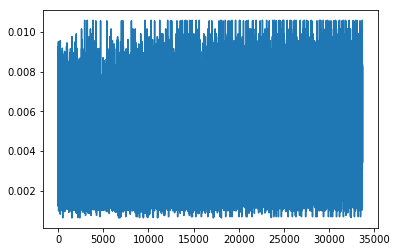

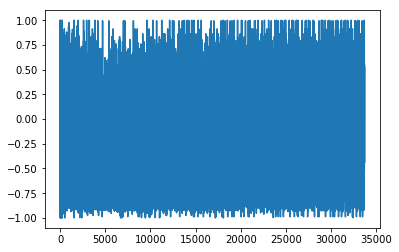

337
1.3843379525
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1983-02-01 00:00:00


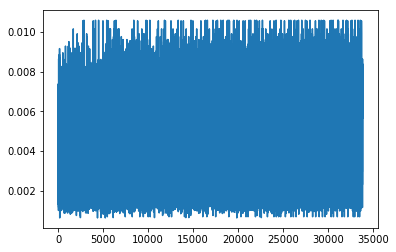

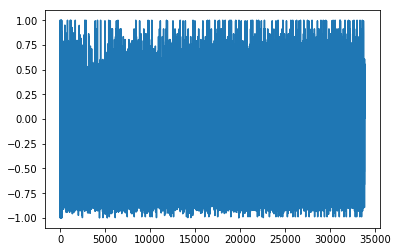

338
1.38307417351
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1983-03-01 00:00:00


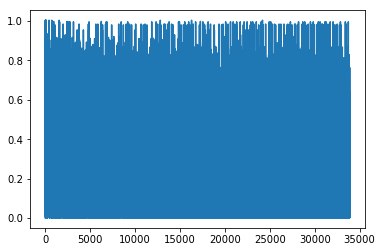

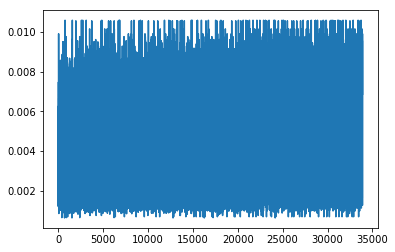

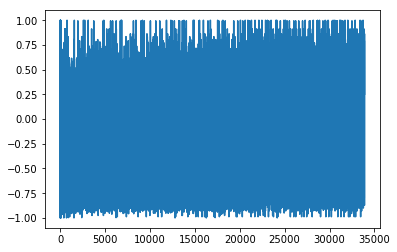

339
1.38338750932
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1983-04-01 00:00:00


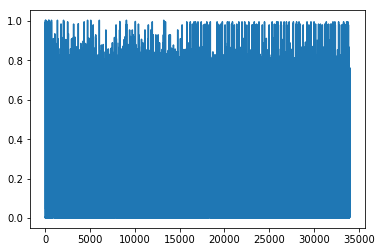

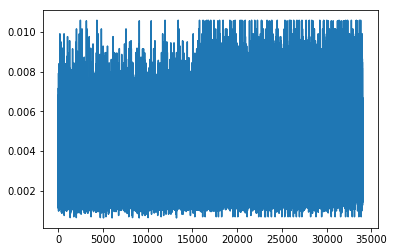

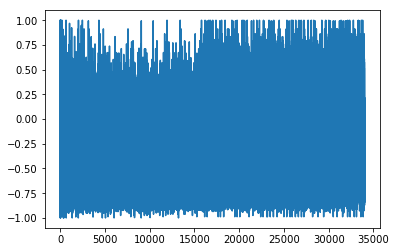

340
1.38585922939
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1983-05-01 00:00:00


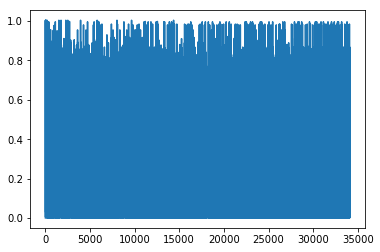

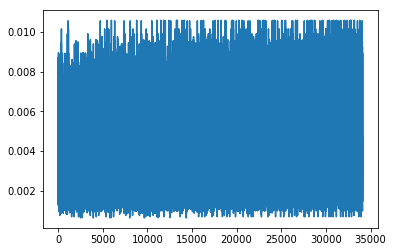

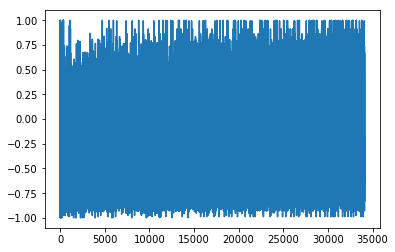

341
1.38209308317
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1983-06-01 00:00:00


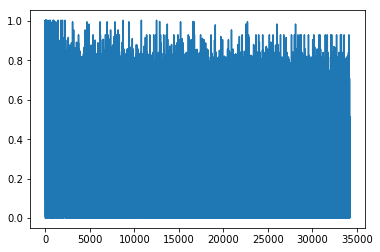

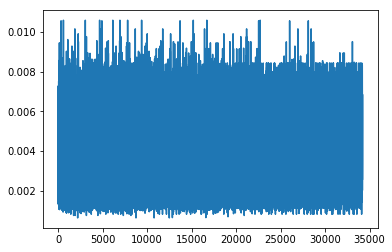

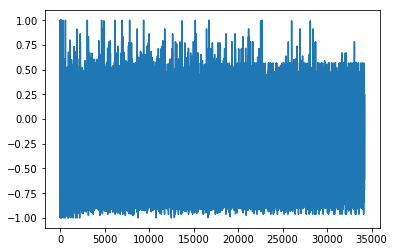

342
1.30850418709
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1983-07-01 00:00:00


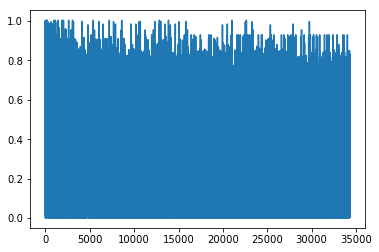

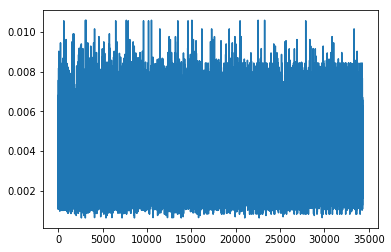

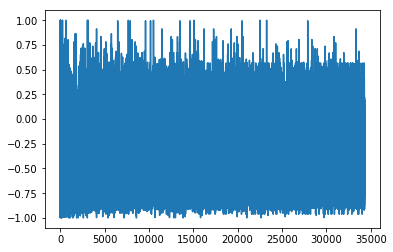

343
1.3067934194
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1983-08-01 00:00:00


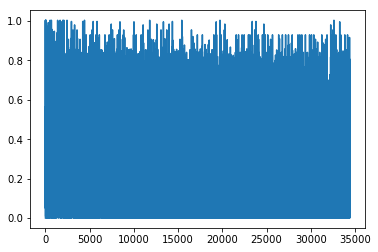

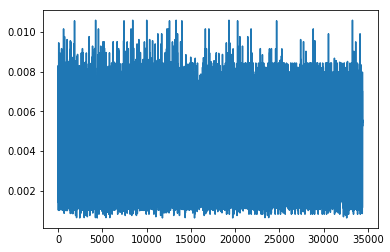

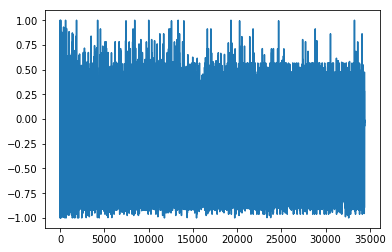

344
1.30883265274
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1983-09-01 00:00:00


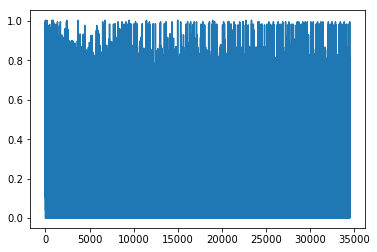

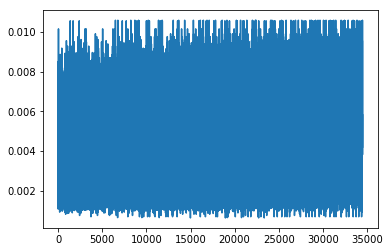

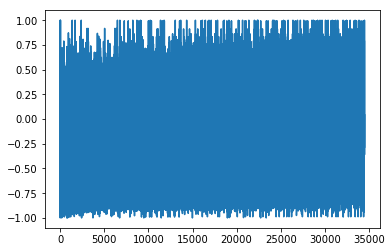

345
1.37753472305
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1983-10-01 00:00:00


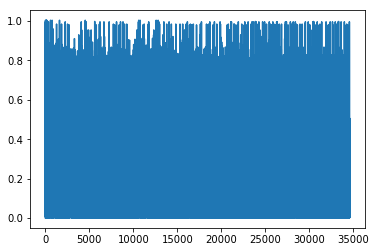

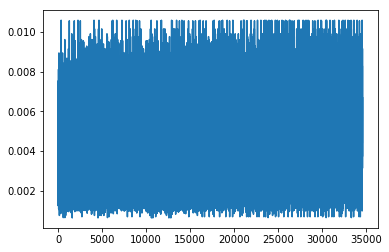

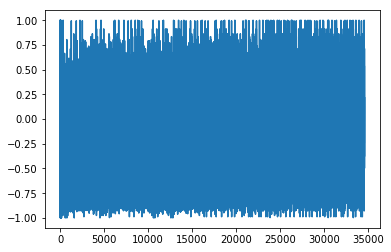

346
1.37803647641
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1983-11-01 00:00:00


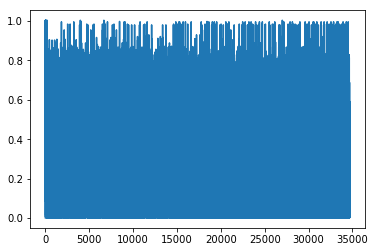

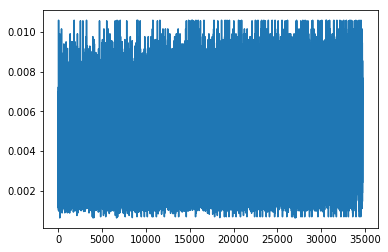

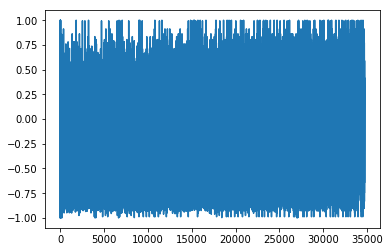

347
1.37679944805
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1983-12-01 00:00:00


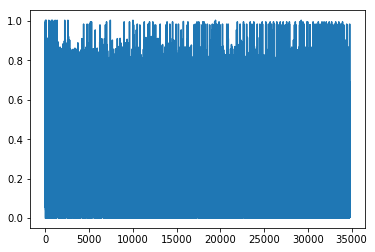

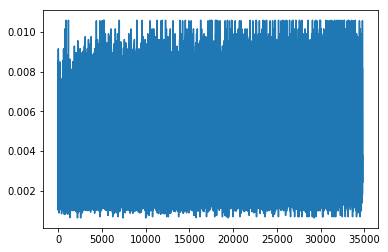

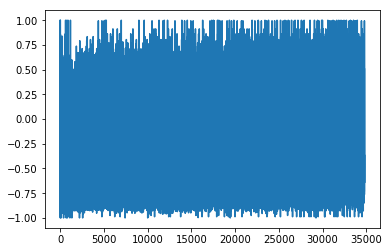

348
1.37750964926
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1984-01-01 00:00:00


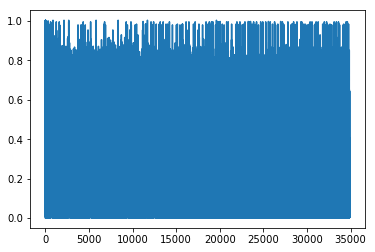

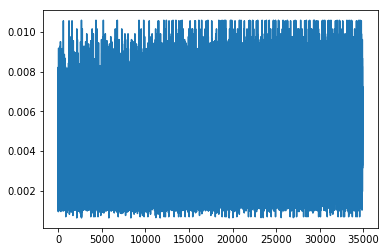

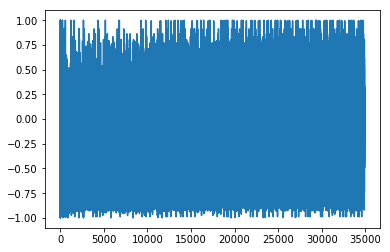

349
1.38341810277
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1984-02-01 00:00:00


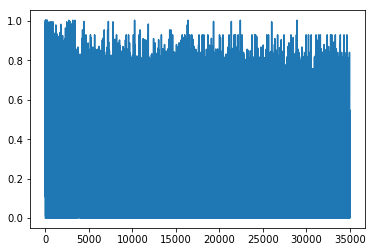

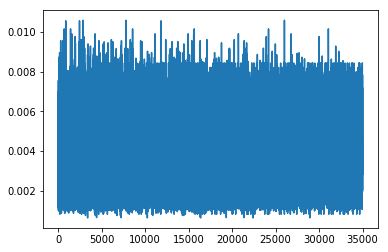

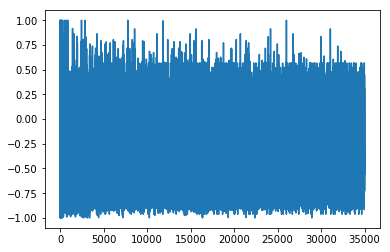

350
1.30911656467
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1984-03-01 00:00:00


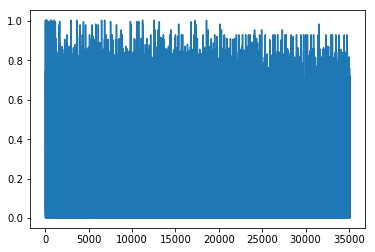

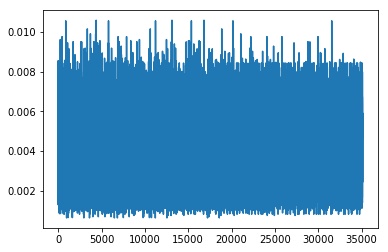

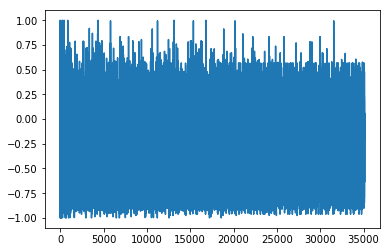

351
1.30855620268
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1984-04-01 00:00:00


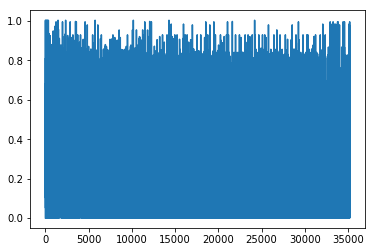

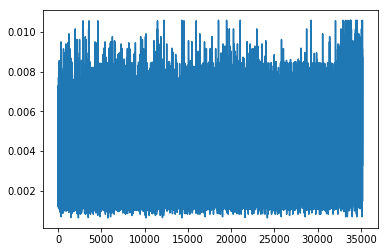

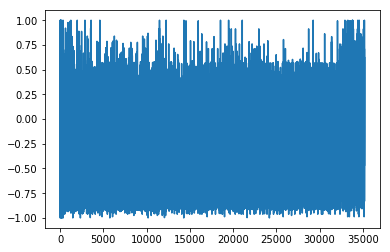

352
1.3855287611
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1984-05-01 00:00:00


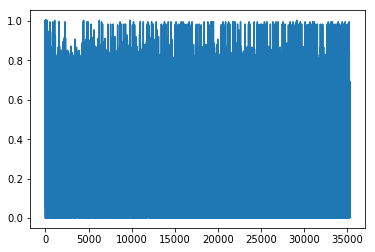

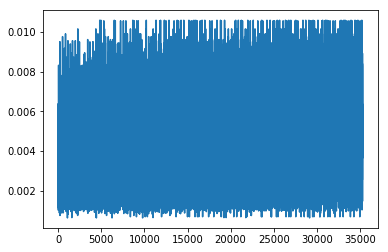

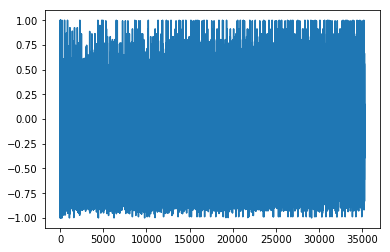

353
1.38817001867
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1984-06-01 00:00:00


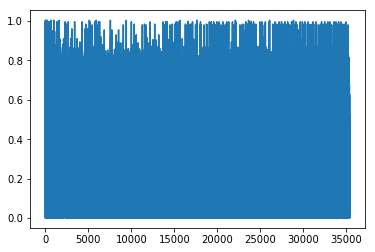

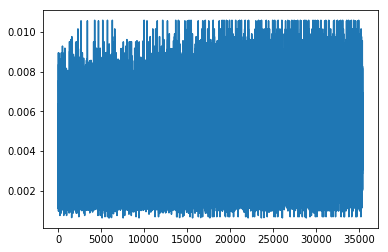

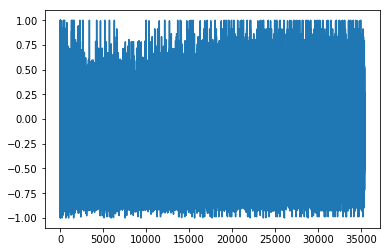

354
1.39159713817
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1984-07-01 00:00:00


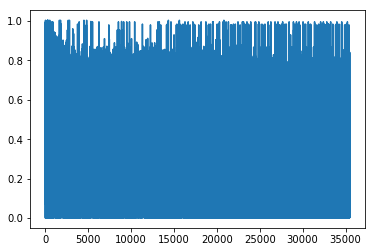

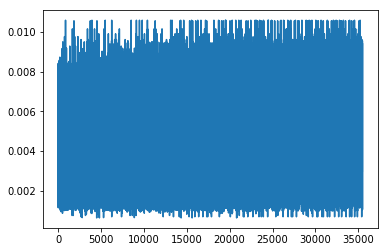

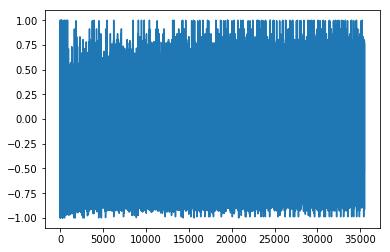

355
1.38971620755
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1984-08-01 00:00:00


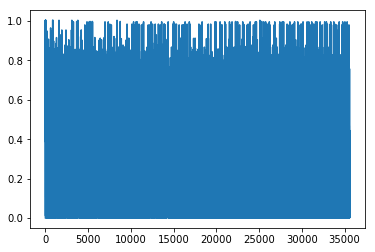

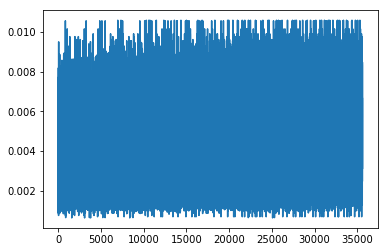

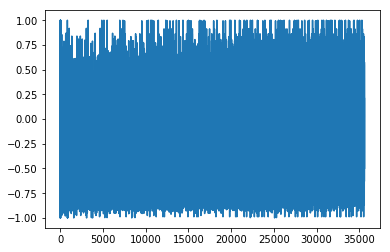

356
1.38601160068
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1984-09-01 00:00:00


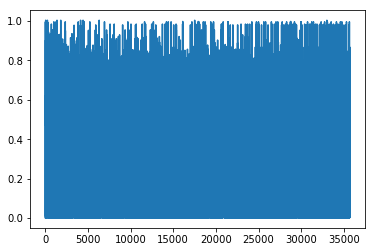

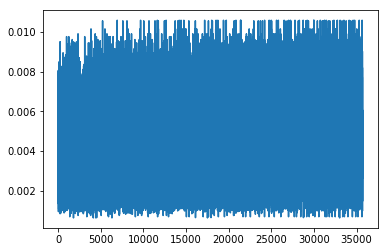

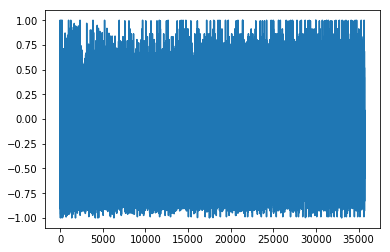

357
1.38588924646
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1984-10-01 00:00:00


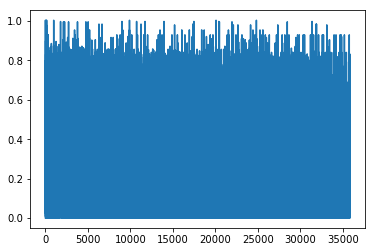

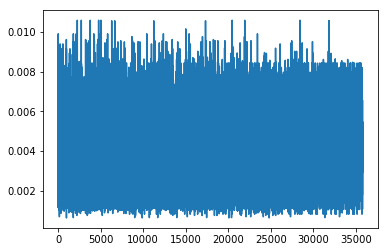

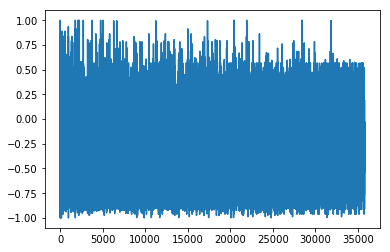

358
1.30923926733
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1984-11-01 00:00:00


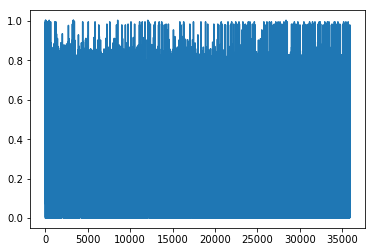

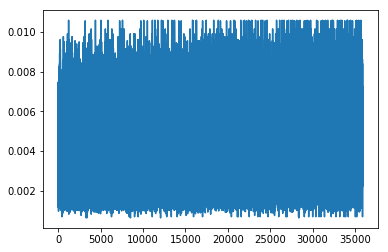

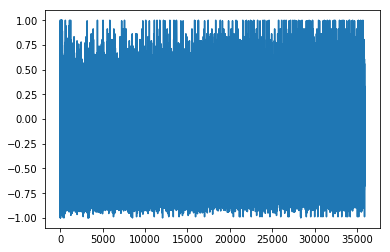

359
1.385297133
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1984-12-01 00:00:00


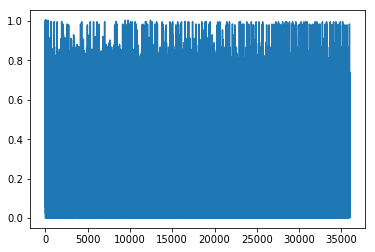

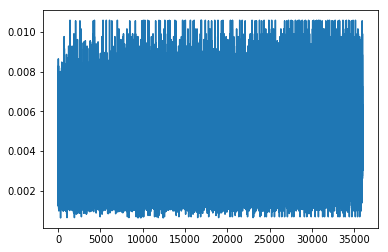

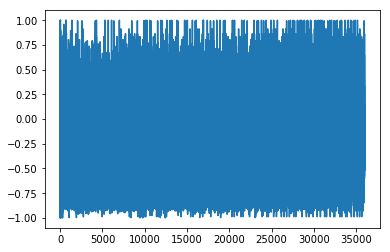

360
1.39040373212
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1985-01-01 00:00:00


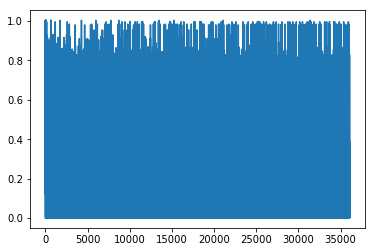

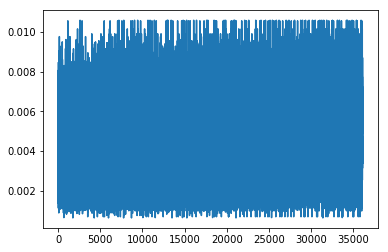

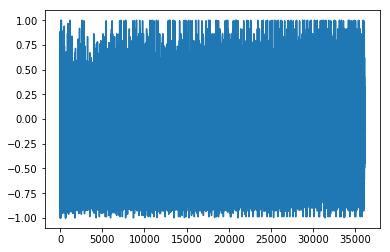

361
1.39114884333
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1985-02-01 00:00:00


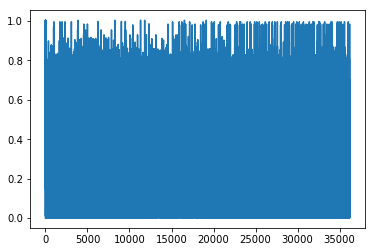

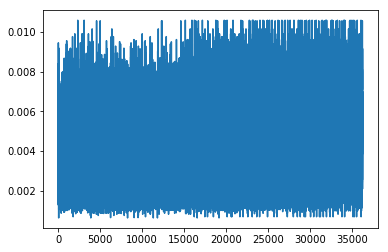

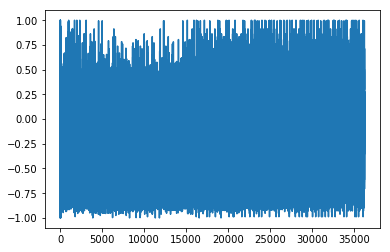

362
1.39259825151
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1985-03-01 00:00:00


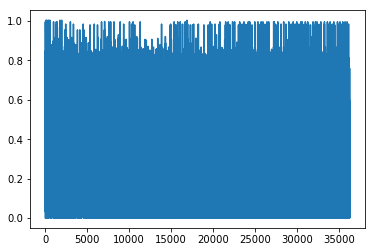

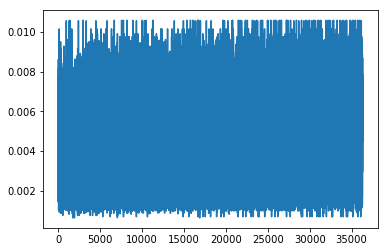

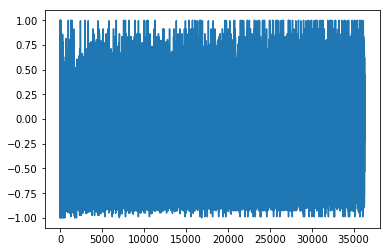

363
1.39519114901
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1985-04-01 00:00:00


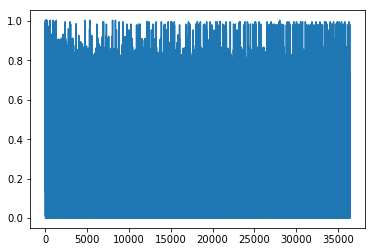

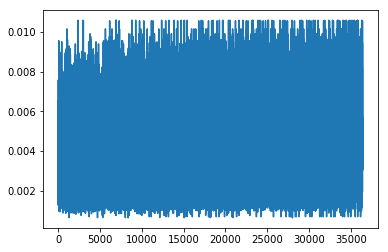

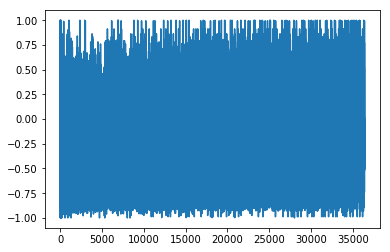

364
1.39263612207
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1985-05-01 00:00:00


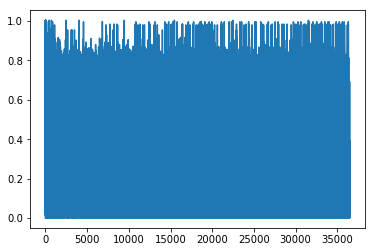

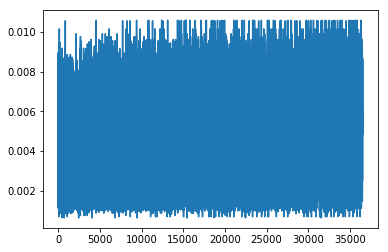

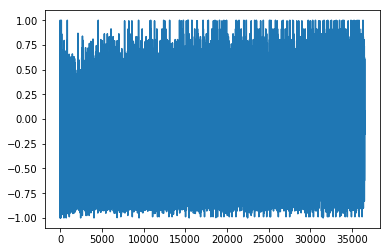

365
1.39525683496
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1985-06-01 00:00:00


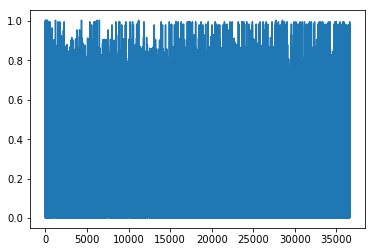

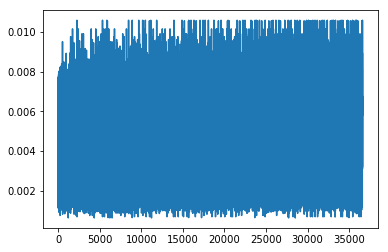

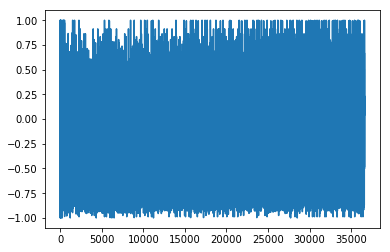

366
1.39030422419
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1985-07-01 00:00:00


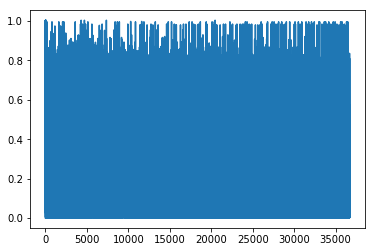

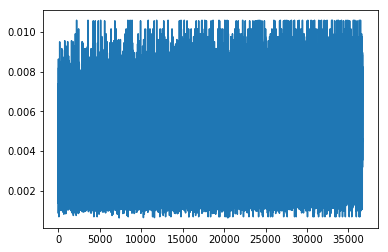

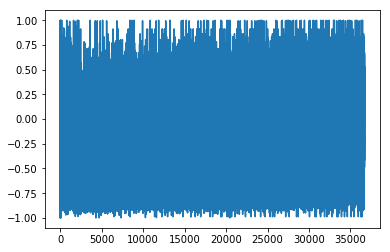

367
1.38836808921
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1985-08-01 00:00:00


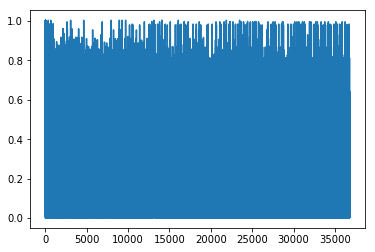

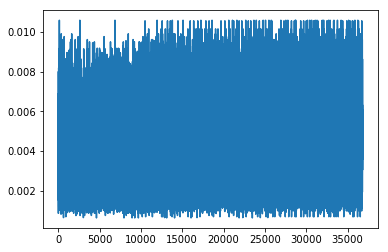

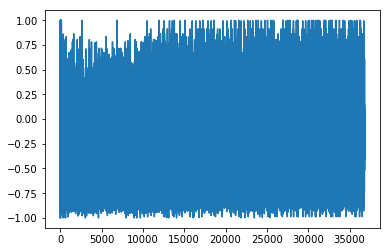

368
1.38460209734
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1985-09-01 00:00:00


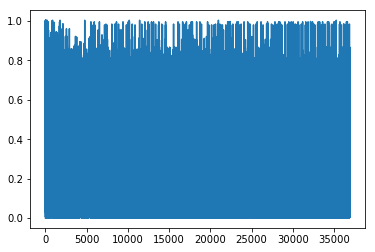

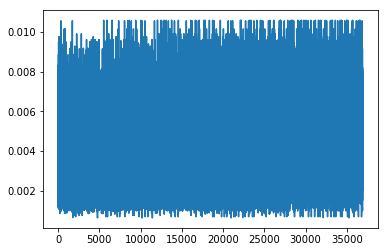

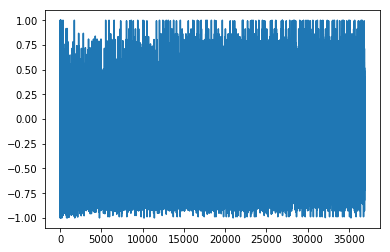

369
1.38525795396
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1985-10-01 00:00:00


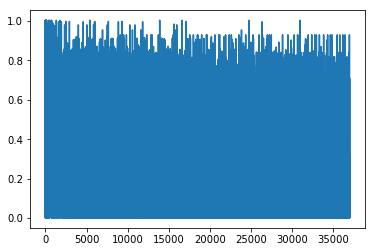

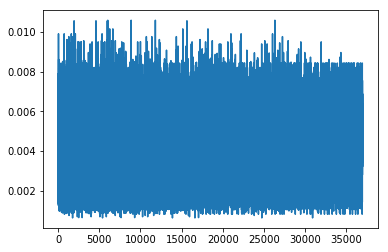

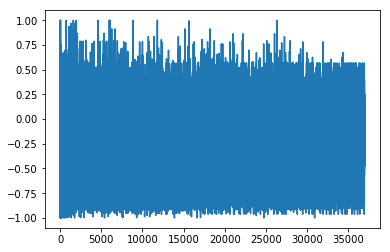

370
1.31631626654
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1985-11-01 00:00:00


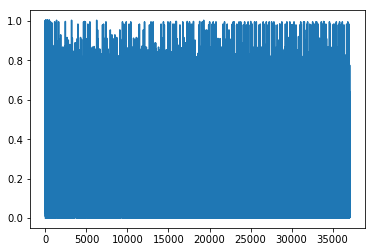

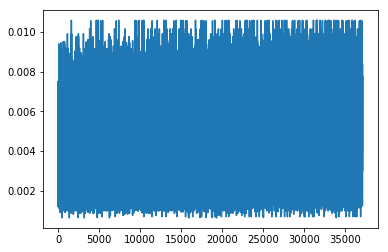

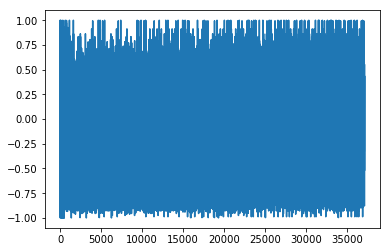

371
1.39401310561
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1985-12-01 00:00:00


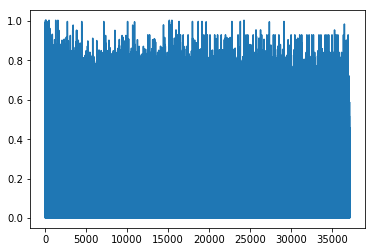

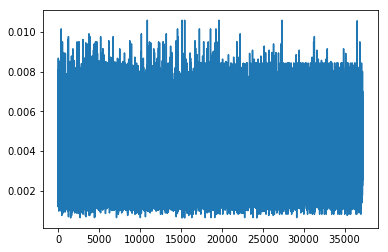

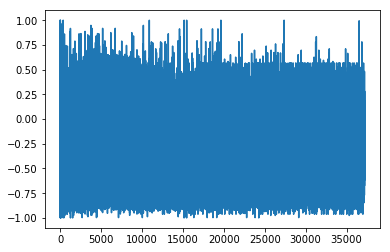

372
1.31538614389
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1986-01-01 00:00:00


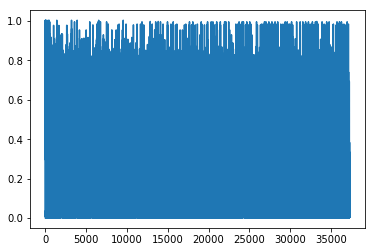

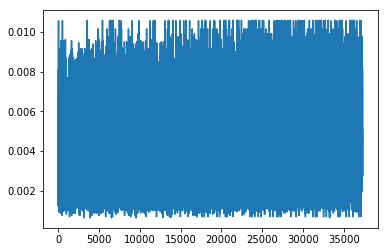

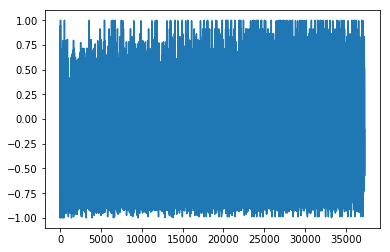

373
1.39483378041
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1986-02-01 00:00:00


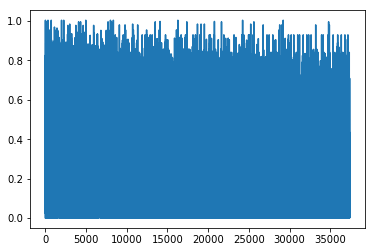

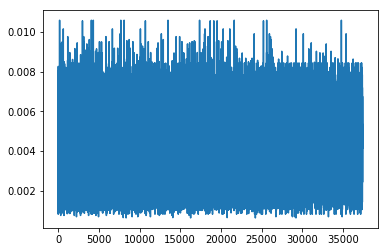

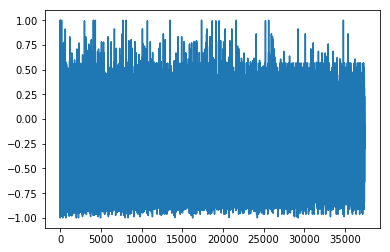

374
1.31609394531
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1986-03-01 00:00:00


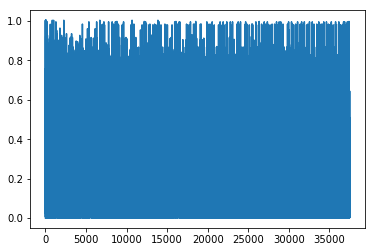

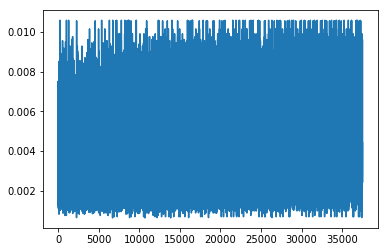

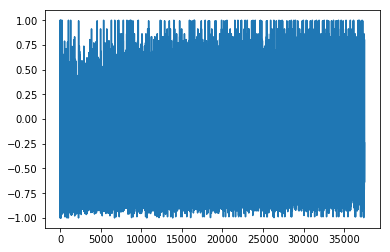

375
1.39208316056
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1986-04-01 00:00:00


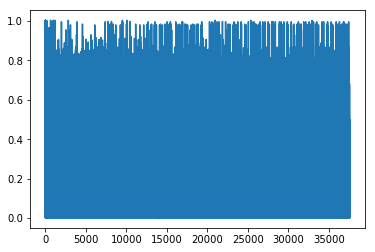

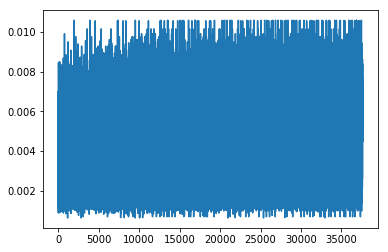

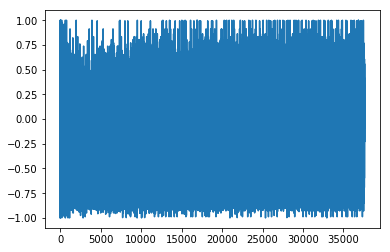

376
1.39045903902
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1986-05-01 00:00:00


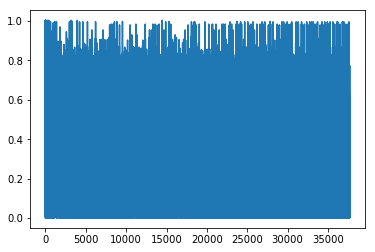

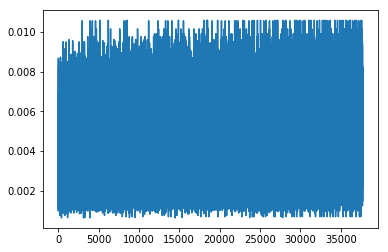

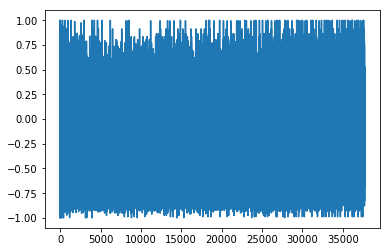

377
1.38693790304
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1986-06-01 00:00:00


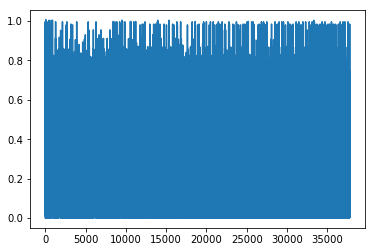

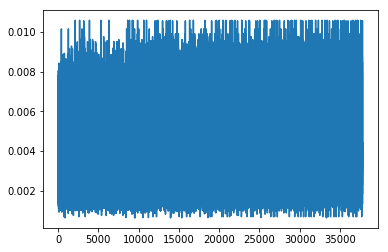

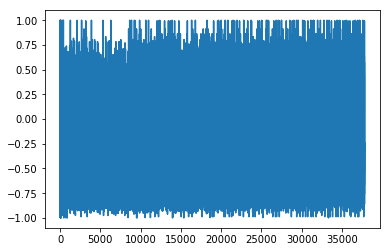

378
1.38477334407
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1986-07-01 00:00:00


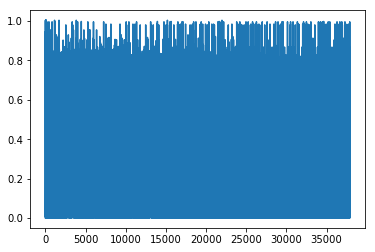

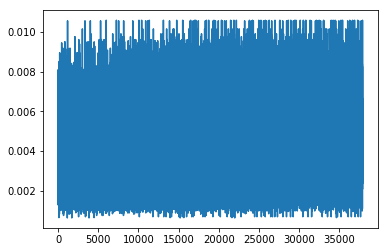

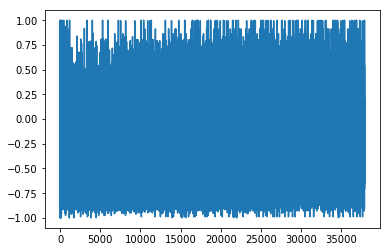

379
1.38438529502
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1986-08-01 00:00:00


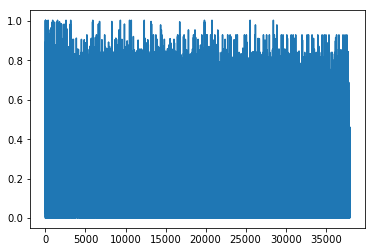

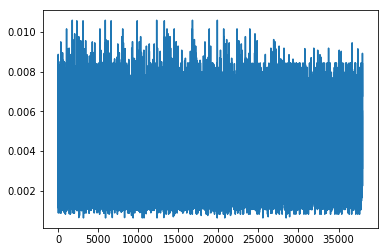

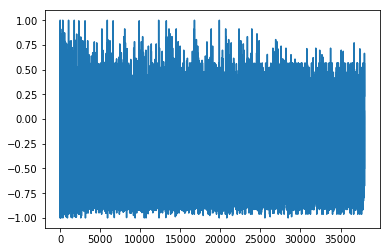

380
1.31033101263
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1986-09-01 00:00:00


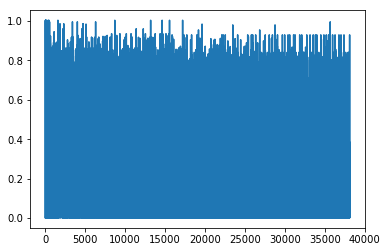

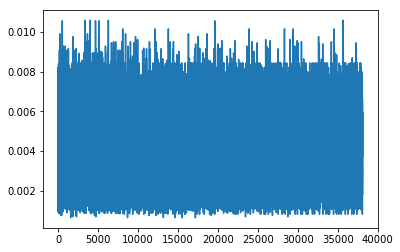

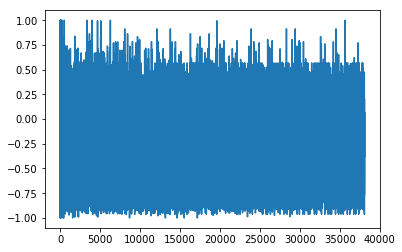

381
1.31105591711
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1986-10-01 00:00:00


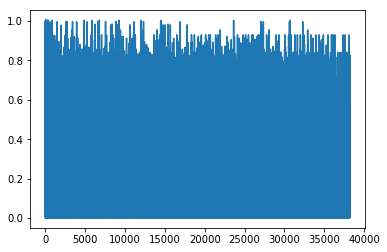

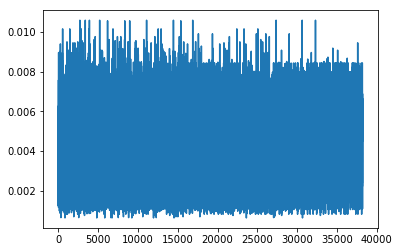

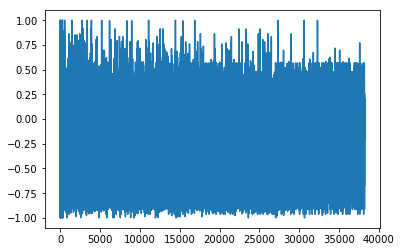

382
1.31345721186
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1986-11-01 00:00:00


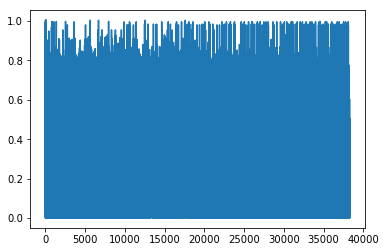

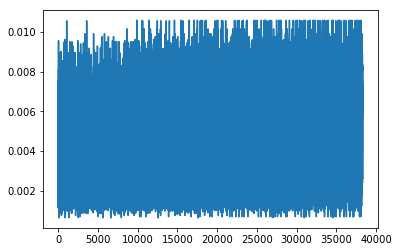

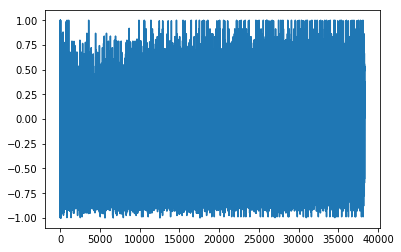

383
1.39308847991
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1986-12-01 00:00:00


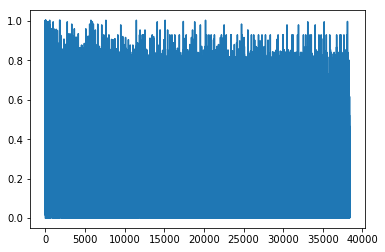

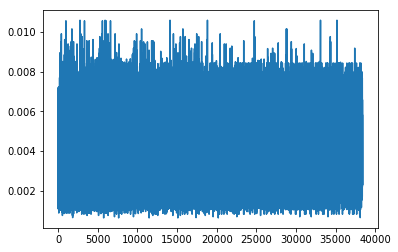

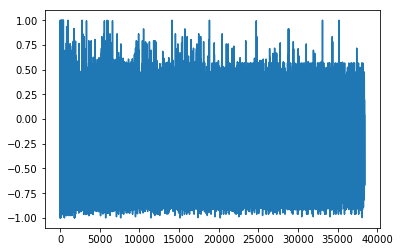

384
1.31801859481
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1987-01-01 00:00:00


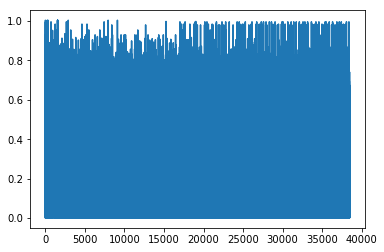

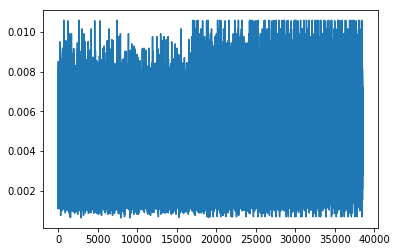

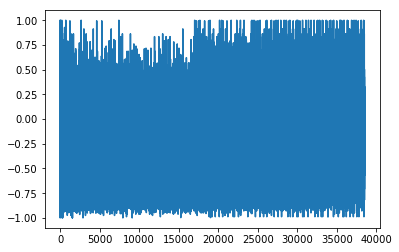

385
1.39186810163
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1987-02-01 00:00:00


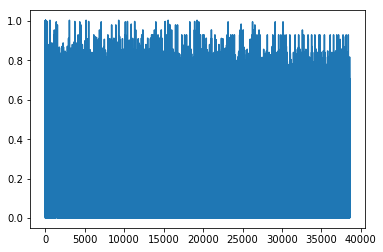

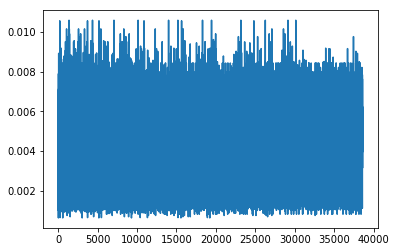

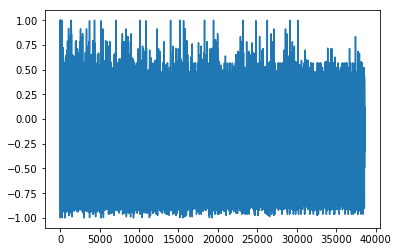

386
1.31273484385
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1987-03-01 00:00:00


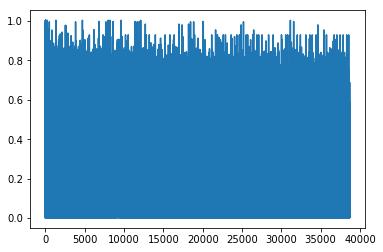

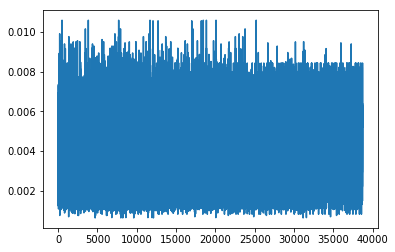

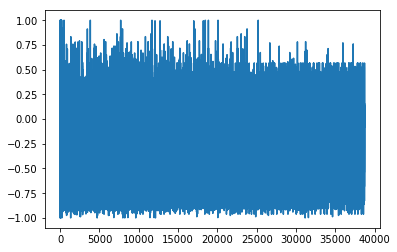

387
1.31334255033
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1987-04-01 00:00:00


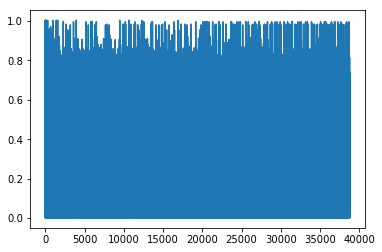

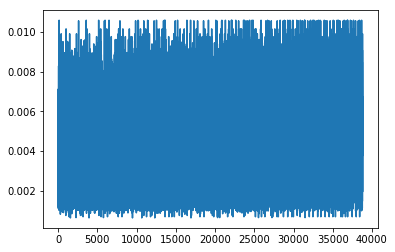

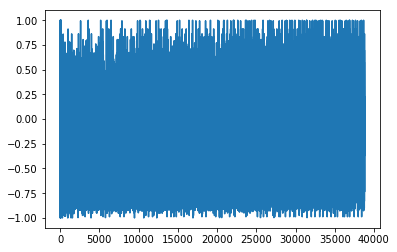

388
1.39524735915
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1987-05-01 00:00:00


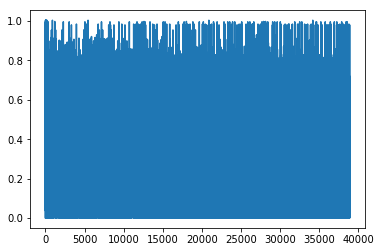

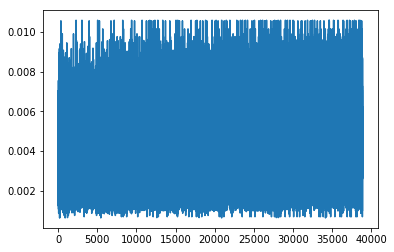

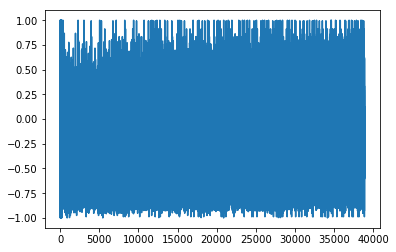

389
1.39822214083
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1987-06-01 00:00:00


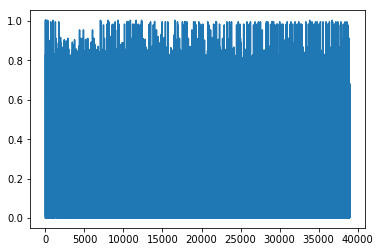

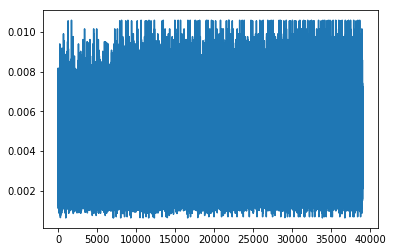

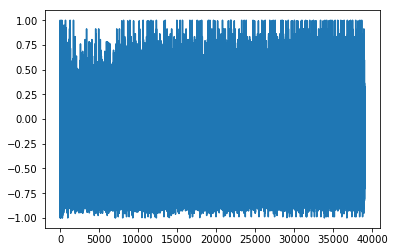

390
1.39945373719
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1987-07-01 00:00:00


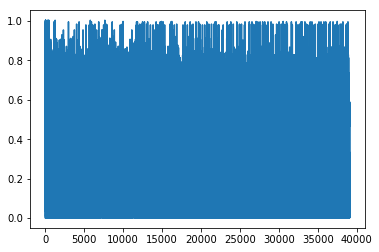

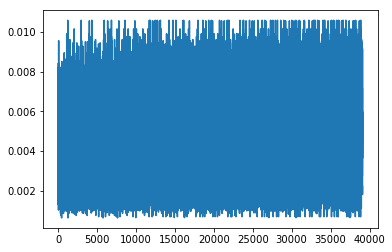

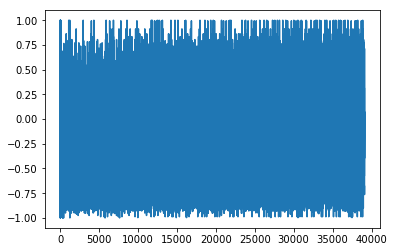

391
1.39836727583
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1987-08-01 00:00:00


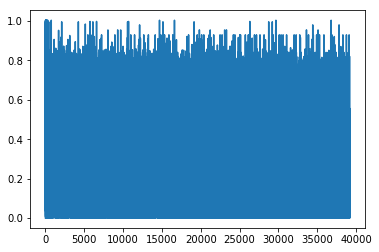

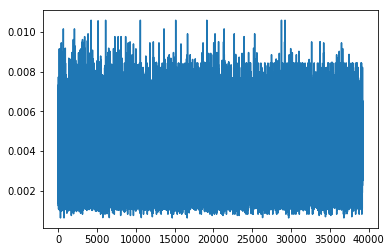

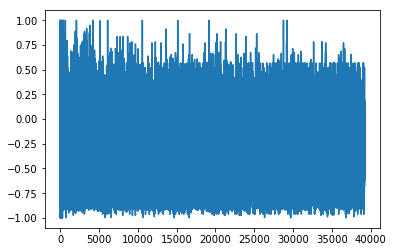

392
1.32213434653
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1987-09-01 00:00:00


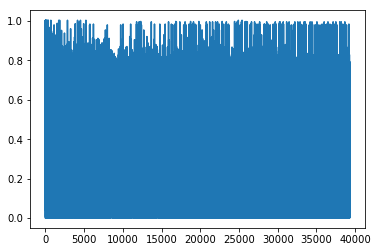

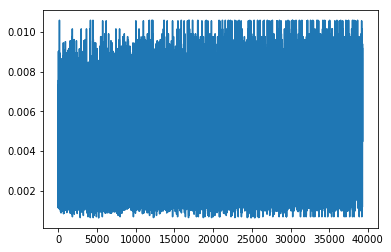

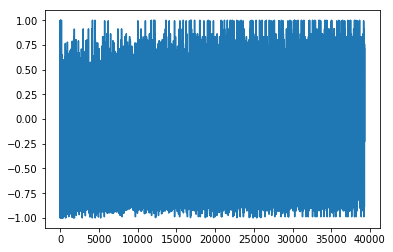

393
1.39621908315
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1987-10-01 00:00:00


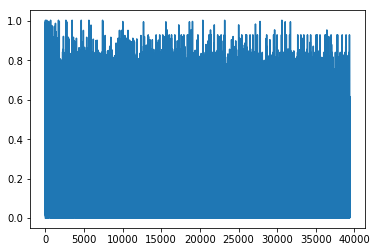

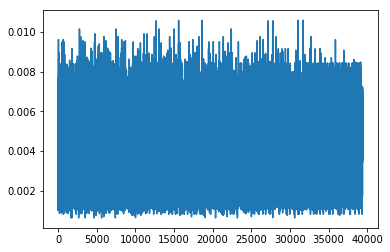

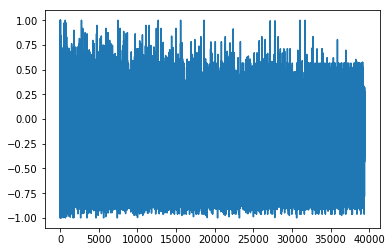

394
1.32496730023
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1987-11-01 00:00:00


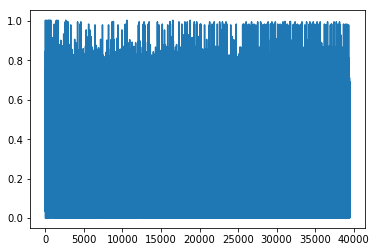

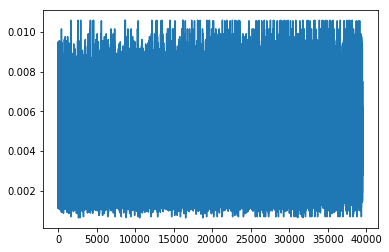

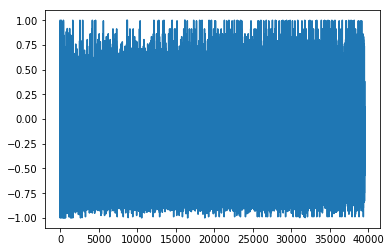

395
1.39674549654
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1987-12-01 00:00:00


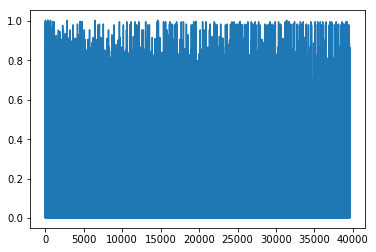

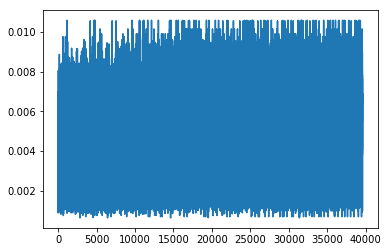

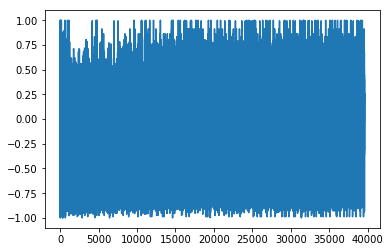

396
1.39817321403
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1988-01-01 00:00:00


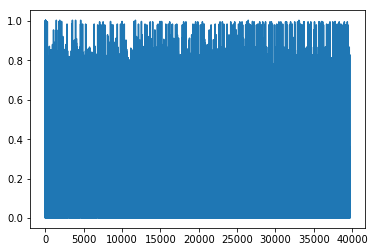

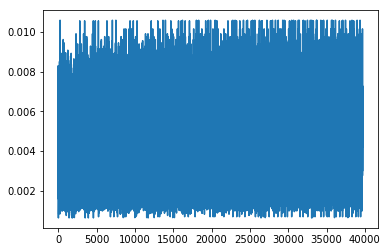

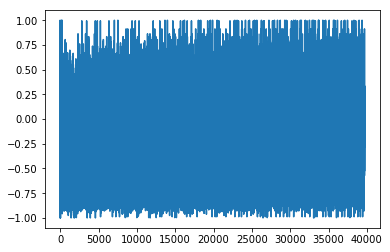

397
1.40186092982
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1988-02-01 00:00:00


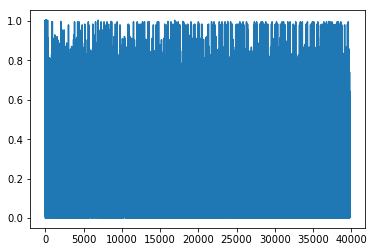

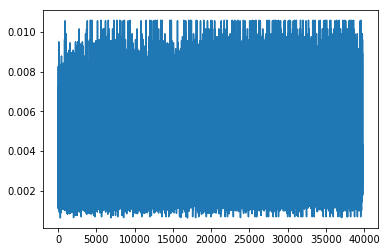

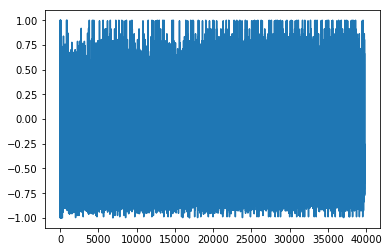

398
1.40479439819
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1988-03-01 00:00:00


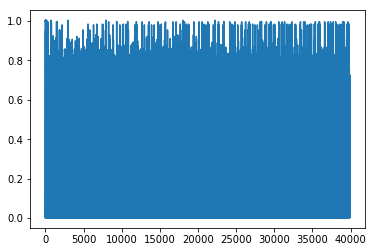

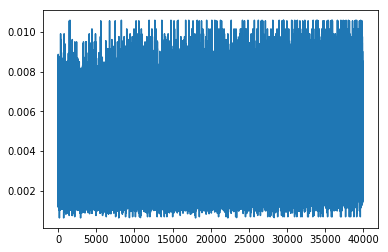

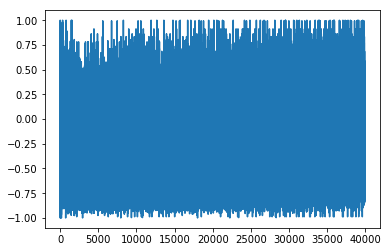

399
1.41011460469
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1988-04-01 00:00:00


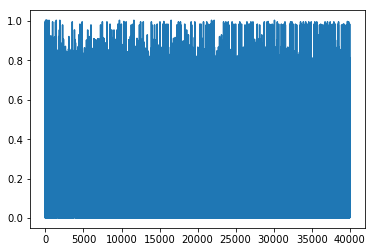

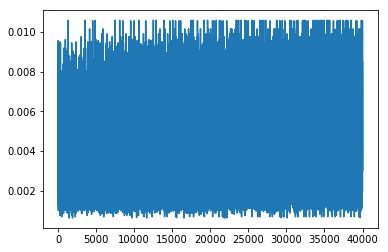

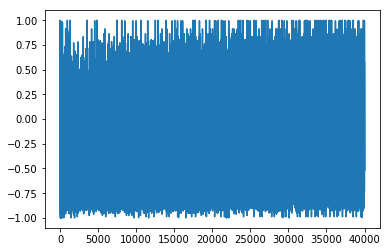

400
1.40919365356
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1988-05-01 00:00:00


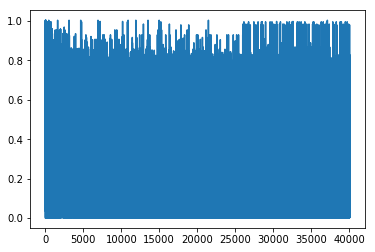

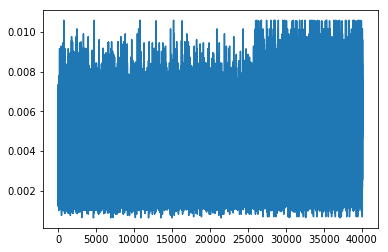

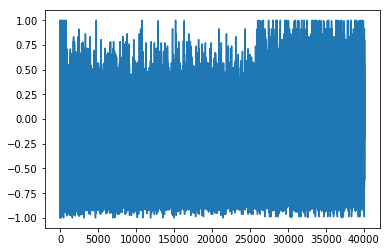

401
1.40935157573
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1988-06-01 00:00:00


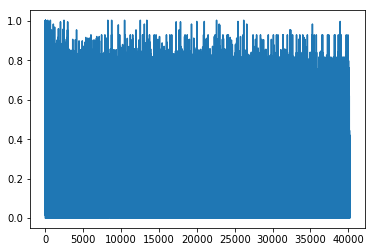

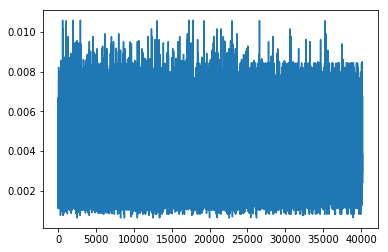

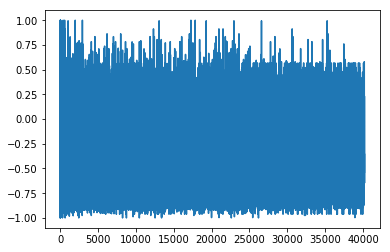

402
1.32570589315
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1988-07-01 00:00:00


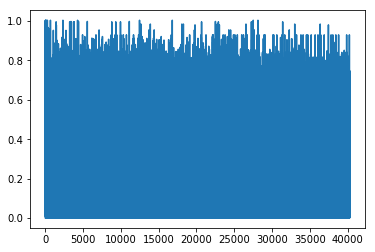

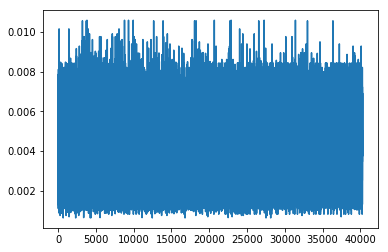

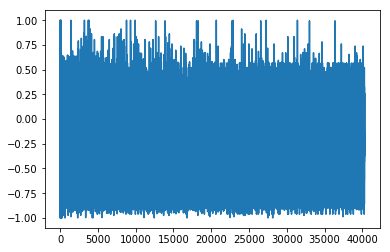

403
1.32703116423
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1988-08-01 00:00:00


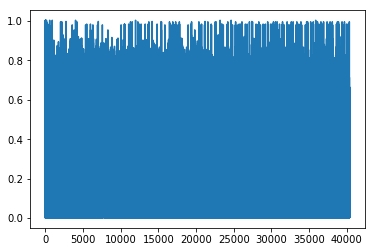

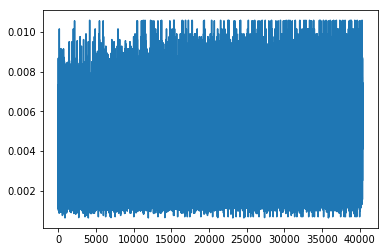

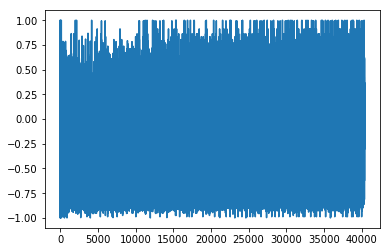

404
1.41254672657
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1988-09-01 00:00:00


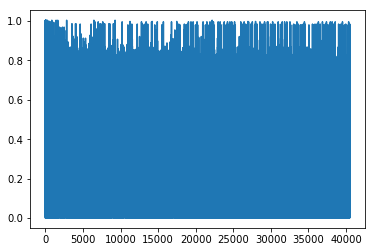

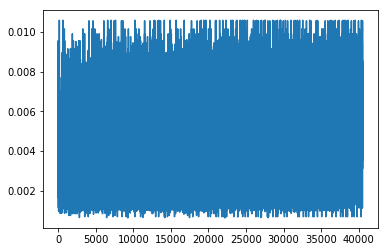

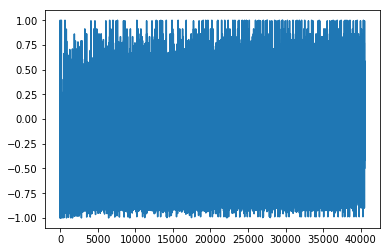

405
1.41346353694
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1988-10-01 00:00:00


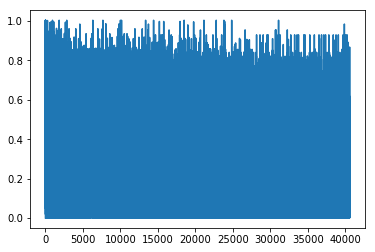

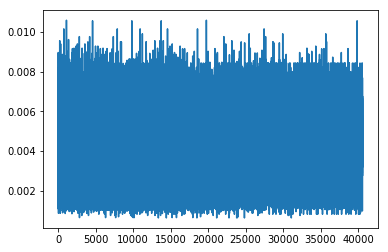

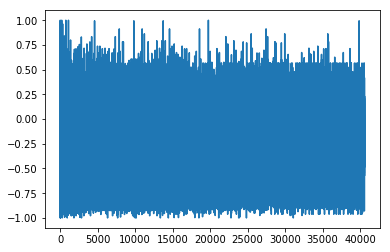

406
1.33160139422
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1988-11-01 00:00:00


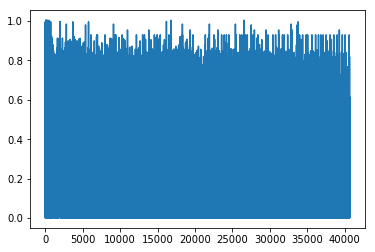

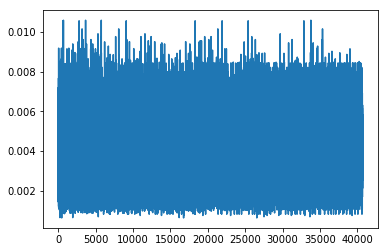

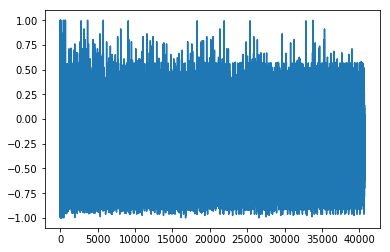

407
1.33179679887
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1988-12-01 00:00:00


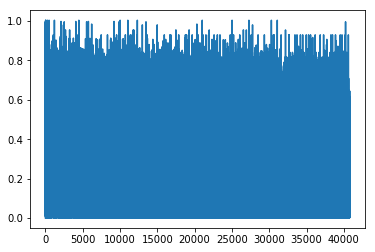

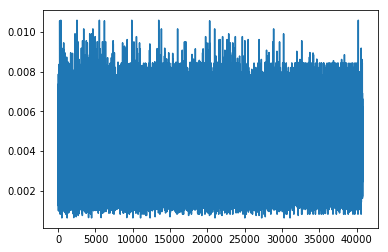

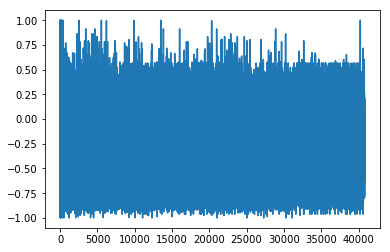

408
1.32921444087
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1989-01-01 00:00:00


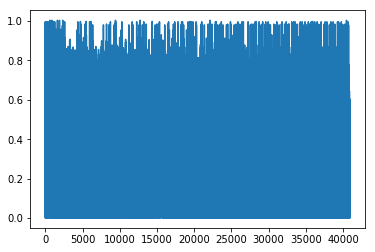

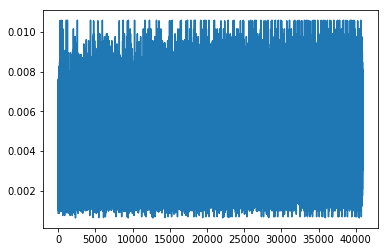

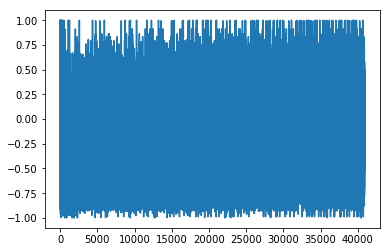

409
1.41175569941
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]
Writing away results
1989-02-01 00:00:00


In [ ]:
# initialize
init = tf.global_variables_initializer()
startepsilon = 1
endepsilon = 0.1
startlr = 0.8
endlr = 0.01
startgamma = 0.01
endgamma = 0.8
TWlist = []
Index = []
MWeights = []
Turnover = []
chooserlist = []
RU = []
learningrateQ = 0.01
n = len(mdata)
periods = 60
epochs = 100     # preferred to have a low amount of epochs because otherwise the the same data is used multiple times (usually not the case in stock returns)

# data parsing
dates = data['Date']
mdata = data[['r','xs','xb']]
mdata.index = pd.DatetimeIndex(dates)

# include the lags
for i in range(1,num_lags+1):  # 1 till 11
    mdata['r_lag' + str(i)] = mdata['r'].shift(i)
    mdata['xs_lag' + str(i)] = mdata['xs'].shift(i)
    mdata['xb_lag' + str(i)] = mdata['xb'].shift(i)

mdata.drop(mdata.head(num_lags).index, inplace=True)
# have a look at the data (if not include NANs)
# print(mdata)

# Train the the Q-function DNN
with tf.Session() as sess:
    for i in range(307,int(n-periods-1)):
        lostlist = []
        sess.run(init) # initialize the Neural Network again
        OptimalWeights = np.zeros(periods-1)
        currentK = 0
        print(mdata.index[i])
        rmin = -1
        rmax = 1
        lr = 0.1
        gamma = 0.98
        currentEpoch = 0
        rlist = []  
        runitlist = []
        while currentEpoch < epochs:
            epsilon = startepsilon*(epochs - currentEpoch)/epochs + endepsilon*(1 - (epochs-currentEpoch)/epochs)
            #Training of the Q-Network for the data available (with Neural Nets) 
            indexes = np.asarray(range(i)) # because of range (automatically minus 1(start at 0))
            random.shuffle(indexes)
            for j in indexes:
                s = mdata.iloc[j,:].values.reshape(1,num_inputvar)
                #Choose an action by greedily (with e chance of random action) from the Q-network
                a_int,allQ = sess.run([A_Max,output],feed_dict={NN_input:s})
                a = A[a_int]  # -1 because index
                if np.random.rand(1) < epsilon:
                    a = random.choice(A)

                #Get new state and reward from environment
                s1 = mdata.iloc[j+1,:].values.reshape(1,num_inputvar)
                r = (a*s1[0][1] + (1-a)*s1[0][2]) #reward: this is now the wealth gained from this step, but could be other rewards like utility
                rlist.append(r)
                Q = sess.run(output,feed_dict={NN_input:s1})
                    
                #Obtain maxQ' and set our target value for chosen action.
                Q1 = np.max(Q)
                targetQ = allQ
                if(len(rlist)>1):
                    rmin = np.min(rlist)
                    rmax = np.max(rlist)
                runit = -1 + 2*((r -rmin)/(rmax-rmin))
                targetQ[0,int(a*(num_actions-1))] = runit + gamma*Q1
                runitlist.append(runit)
                #Train the neural network using target and predicted Q values
                opt,W1,loss_ = sess.run([optmzr,w1,loss],feed_dict={NN_input:s,Q_Next:targetQ,learning_rate:lr})
                lostlist.append(loss_)
            currentEpoch += 1
                
        while currentK < periods - 1:
            # After training now calculate the optimal weights for the K=60 periods to come
            s = mdata.iloc[i+currentK,:].values.reshape(1,num_inputvar)
            a_int,allQ = sess.run([A_Max,output],feed_dict={NN_input:s})
            aOpt = A[a_int]
            OptimalWeights[currentK] = aOpt
            currentK += 1
            
        # For insight purposes (Write away)
        plt.ion()
        plt.plot(lostlist)
        plt.show()
        plt.plot(rlist)
        plt.show()
        plt.plot(runitlist)
        plt.show()
        
        firstdiff = OptimalWeights[1:] - OptimalWeights[:-1]
        MWeights.append(np.mean(OptimalWeights))
        TerminalWealth = np.exp(sum(OptimalWeights*mdata[i+1:i+currentK+1]['xs'] + (1-OptimalWeights)*mdata[i+1:i+currentK+1]['xb']))
        TWlist.append(TerminalWealth)
        Index.append(mdata.index[i])
        print(i)
        Turnover.append(sum(abs(firstdiff*np.exp(mdata[i+1:i+currentK]['xs'])) + abs((1-firstdiff)*np.exp(mdata[i+1:i+currentK]['xb']))))
        RU.append((1/(1-5))*pow(TerminalWealth,(1-5)))
        print(TerminalWealth)
        print(OptimalWeights)
        print('Writing away results')
        df = pd.DataFrame({'index date':Index,'TW':TWlist, 'Mean Weights Xs':MWeights,'Turnover':Turnover, 'Realized Utility':RU})
        df.to_excel('DNN_epsilonlearn_currentK_w2_softmax_CER.xlsx', sheet_name='sheet1', index=False)
print('Done!')
        